In [11]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from udisc_stats.preprocess import print_segments, preprocess

from udisc_stats.visualize import (
    get_year_stats,
    moving_avg,
    get_score_avg,
    get_score_counts,
    get_score_df,
    get_cumulative_score_df,
    get_player_stats,
    get_month_df,
    get_goal,
    plot_month_df,
)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
orig_df = pd.read_csv("~/Downloads/Udisc Scorecards 2.csv")

orig_df.head(40)

,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28
0,Par,Bryan Park,Yellow Tees (Shorts),2023-10-09 1510,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monkey,Bryan Park,Yellow Tees (Shorts),2023-10-09 1510,58,0.0,5,3,3,5,3,2,2,3,3,4.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Par,Bryan Park,Yellow Tees (Shorts),2023-10-09 1317,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Monkey,Bryan Park,Yellow Tees (Shorts),2023-10-09 1317,57,-1.0,3,3,3,4,3,2,3,4,4,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bryan Der,Bryan Park,Yellow Tees (Shorts),2023-10-09 1317,65,7.0,3,3,3,4,3,3,3,4,4,5.0,5.0,3.0,2.0,4.0,3.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Par,Bryan Park,Yellow Tees (Shorts),2023-10-06 2121,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Monkey,Bryan Park,Yellow Tees (Shorts),2023-10-06 2121,55,-3.0,3,3,3,4,3,3,2,4,3,3.0,4.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Riley,Bryan Park,Yellow Tees (Shorts),2023-10-06 2121,67,9.0,3,2,3,5,4,3,3,3,4,6.0,7.0,3.0,3.0,4.0,2.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Par,Hardywood West Creek Disc Golf Course,The GOAT @ Hardywood,2023-10-04 2131,55,NaN,3,3,3,4,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Monkey,Hardywood West Creek Disc Golf Course,The GOAT @ Hardywood,2023-10-04 2131,61,6.0,3,4,3,5,3,3,3,4,5,2.0,2.0,5.0,3.0,3.0,3.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = preprocess(orig_df)

df.head(40)

2020-11-05 22:22:00


,PlayerName,CourseName,LayoutName,Date,Total,+/-,Hole1,Hole2,Hole3,Hole4,Hole5,Hole6,Hole7,Hole8,Hole9,Hole10,Hole11,Hole12,Hole13,Hole14,Hole15,Hole16,Hole17,Hole18,Hole19,Hole20,Hole21,Hole22,Hole23,Hole24,Hole25,Hole26,Hole27,Hole28,LayoutNameAdj,Year
0,Par,Bryan Park,Yellow Tees (Shorts),2023-10-09 15:10:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
1,Monkey,Bryan Park,Yellow Tees (Shorts),2023-10-09 15:10:00,58,0.0,5,3,3,5,3,2,2,3,3,4.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
2,Par,Bryan Park,Yellow Tees (Shorts),2023-10-09 13:17:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
3,Monkey,Bryan Park,Yellow Tees (Shorts),2023-10-09 13:17:00,57,-1.0,3,3,3,4,3,2,3,4,4,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
4,Bryan Der,Bryan Park,Yellow Tees (Shorts),2023-10-09 13:17:00,65,7.0,3,3,3,4,3,3,3,4,4,5.0,5.0,3.0,2.0,4.0,3.0,5.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
5,Par,Bryan Park,Yellow Tees (Shorts),2023-10-06 21:21:00,58,NaN,3,3,3,4,3,3,3,4,3,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
6,Monkey,Bryan Park,Yellow Tees (Shorts),2023-10-06 21:21:00,55,-3.0,3,3,3,4,3,3,2,4,3,3.0,4.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
7,Riley,Bryan Park,Yellow Tees (Shorts),2023-10-06 21:21:00,67,9.0,3,2,3,5,4,3,3,3,4,6.0,7.0,3.0,3.0,4.0,2.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yellows Tees,2023
8,Par,Hardywood West Creek Disc Golf Course,The GOAT @ Hardywood,2023-10-04 21:31:00,55,NaN,3,3,3,4,3,3,3,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The GOAT @ Hardywood,2023
9,Monkey,Hardywood West Creek Disc Golf Course,The GOAT @ Hardywood,2023-10-04 21:31:00,61,6.0,3,4,3,5,3,3,3,4,5,2.0,2.0,5.0,3.0,3.0,3.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The GOAT @ Hardywood,2023


In [14]:
score_df = get_score_df(df)

score_df.tail(20)

,PlayerName,CourseName,LayoutNameAdj,Date,Year,Hole,Score,Par,Diff,ScoreName
11718,Monkey,Bryan Park,Yellows Tees,2023-10-09 13:17:00,2023,Hole17,3.0,4.0,-1.0,Birdie
11719,Monkey,Bryan Park,Yellows Tees,2023-10-09 13:17:00,2023,Hole18,3.0,3.0,0.0,Par
11720,Monkey,Bryan Park,Yellows Tees,2023-10-09 15:10:00,2023,Hole01,5.0,3.0,2.0,Double Bogie
11721,Monkey,Bryan Park,Yellows Tees,2023-10-09 15:10:00,2023,Hole02,3.0,3.0,0.0,Par
11722,Monkey,Bryan Park,Yellows Tees,2023-10-09 15:10:00,2023,Hole03,3.0,3.0,0.0,Par
11723,Monkey,Bryan Park,Yellows Tees,2023-10-09 15:10:00,2023,Hole04,5.0,4.0,1.0,Bogie
11724,Monkey,Bryan Park,Yellows Tees,2023-10-09 15:10:00,2023,Hole05,3.0,3.0,0.0,Par
11725,Monkey,Bryan Park,Yellows Tees,2023-10-09 15:10:00,2023,Hole06,2.0,3.0,-1.0,Birdie
11726,Monkey,Bryan Park,Yellows Tees,2023-10-09 15:10:00,2023,Hole07,2.0,3.0,-1.0,Birdie
11727,Monkey,Bryan Park,Yellows Tees,2023-10-09 15:10:00,2023,Hole08,3.0,4.0,-1.0,Birdie


In [21]:
print_segments(df)

Players: ['Par', 'Monkey', 'Bryan Der', 'Riley', 'Sam Forsyth', 'Austin', 'Allison', 'Kameron', 'Josh', 'Anna', 'Noah', 'Natty', 'Jack', 'Holly', 'Scott', 'James M.', 'Bryce', 'John Farmer', 'Tyler', 'Hitesh', 'Glasser', 'David', 'Patty Ice ']
Courses: ['Bryan Park', 'Hardywood West Creek Disc Golf Course', 'Dunncroft - Castle Point Park', 'Cedarcrest Park DGC', 'Highland Park', 'University Of Richmond', 'The Monster at Fighting Creek', 'Walnut Creek Park', 'THE Diavolo DGC @ New Hope Park', 'Gillies Creek Park', 'Dorey Park', 'Elver Park', 'Nine Springs Golf Course', 'Schenley Park', 'Loriella Park', "Bird's Ruins", 'Bluemont Park']
Layouts: ['Yellows Tees', 'The GOAT @ Hardywood', 'Paver Tees', 'Shorts then Longs', 'Double Round', '2023 update ', 'Main', 'Smooth Flow - Shorts', 'Short - Long', 'Red - Short Tees', 'Diavolo White', 'White - Short Tees', 'Front 9 ', '2022 USWDGC', 'White Tees', 'White Tees to Yellow Baskets', 'Shorts To Shorts', 'Back 9', 'Blue - Long Tees', 'Chainbange

In [16]:
course="Bryan Park"
# course="Dunncroft - Castle Point Park"

layout="Yellows Tees"
# layout="Paver Tees"
# layout = "Shorts then Longs"

# min_date="2020-01"
min_date="2021-01"
# min_date="2022-01"

In [17]:
seg_cols = ["CourseName", "LayoutNameAdj"]
merge_cols = seg_cols + ["Hole"]
max_hole_df = score_df[merge_cols].groupby(seg_cols).max()

ma_df = max_hole_df.merge(score_df, on=merge_cols, how="left")

ma_df

,CourseName,LayoutNameAdj,Hole,PlayerName,Date,Year,Score,Par,Diff,ScoreName
0,Bird's Ruins,Shorts To Shorts,Hole28,James M.,2022-05-04 23:03:00,2022,4.0,3.0,1.0,Bogie
1,Bird's Ruins,Shorts To Shorts,Hole28,Monkey,2022-05-04 23:03:00,2022,3.0,3.0,0.0,Par
2,Bird's Ruins,Shorts To Shorts,Hole28,Scott,2022-05-04 23:03:00,2022,3.0,3.0,0.0,Par
3,Bluemont Park,Chainbangers’ 18,Hole18,Hitesh,2021-09-04 20:13:00,2021,5.0,4.0,1.0,Bogie
4,Bluemont Park,Chainbangers’ 18,Hole18,Monkey,2021-09-04 20:13:00,2021,4.0,4.0,0.0,Par
...,...,...,...,...,...,...,...,...,...,...
654,University Of Richmond,Main,Hole18,Monkey,2023-04-29 18:16:00,2023,3.0,3.0,0.0,Par
655,University Of Richmond,Main,Hole18,Riley,2023-04-29 18:16:00,2023,3.0,3.0,0.0,Par
656,Walnut Creek Park,Short - Long,Hole18,Kameron,2023-01-28 16:43:00,2023,4.0,4.0,0.0,Par
657,Walnut Creek Park,Short - Long,Hole18,Monkey,2023-01-28 16:43:00,2023,4.0,4.0,0.0,Par


/Users/justinessert/github/projects/udisc_stats/udisc_stats/visualize.py:117: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site-packages/calmap/__init__.py:202: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site-packages/calmap/__init__.py:206: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site-packages/calmap/__init__.py:202: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site

/Users/justinessert/github/projects/udisc_stats/udisc_stats/visualize.py:136: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



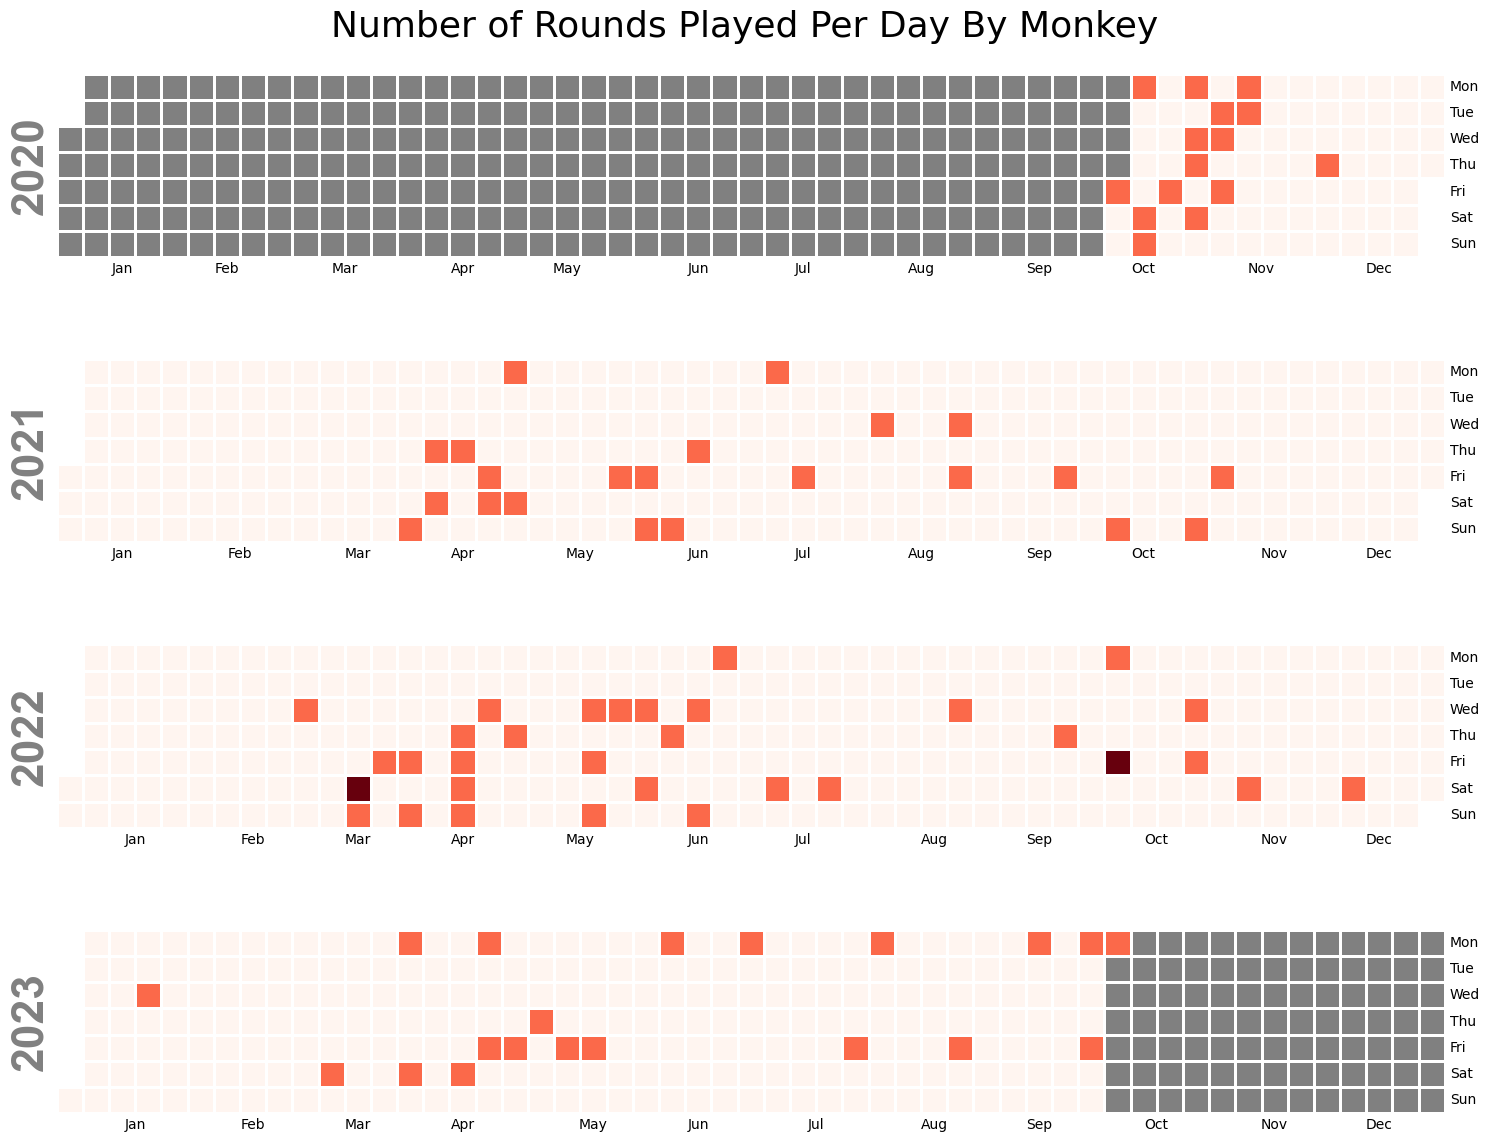

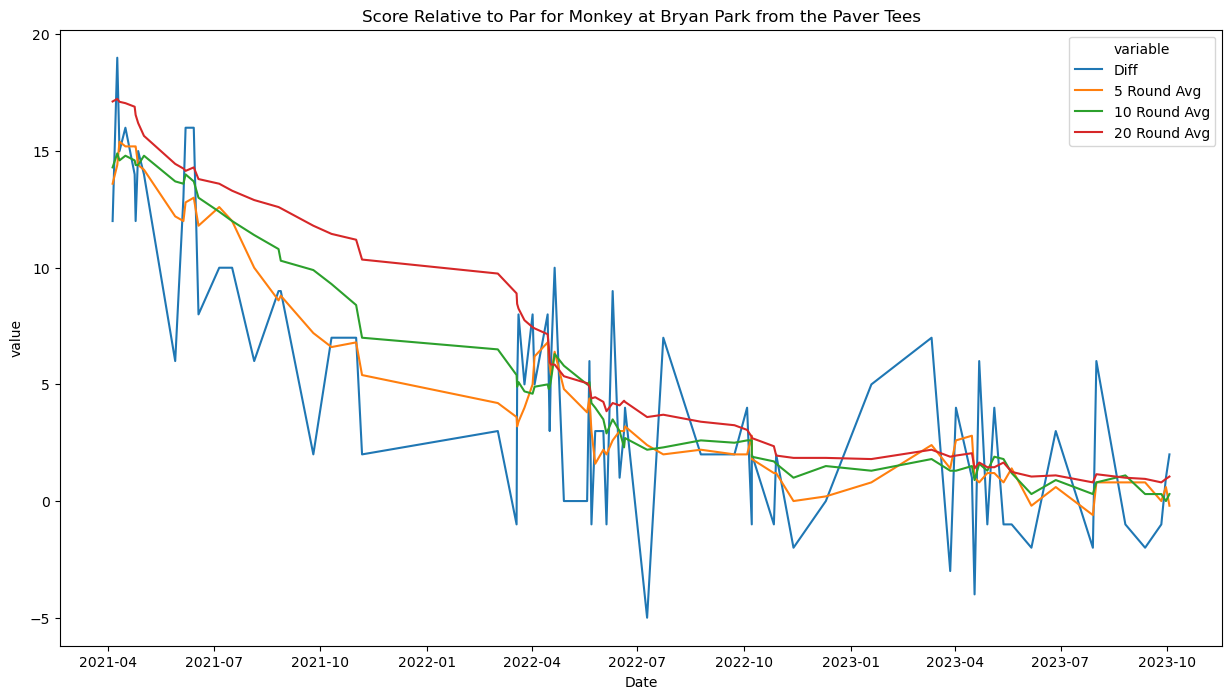

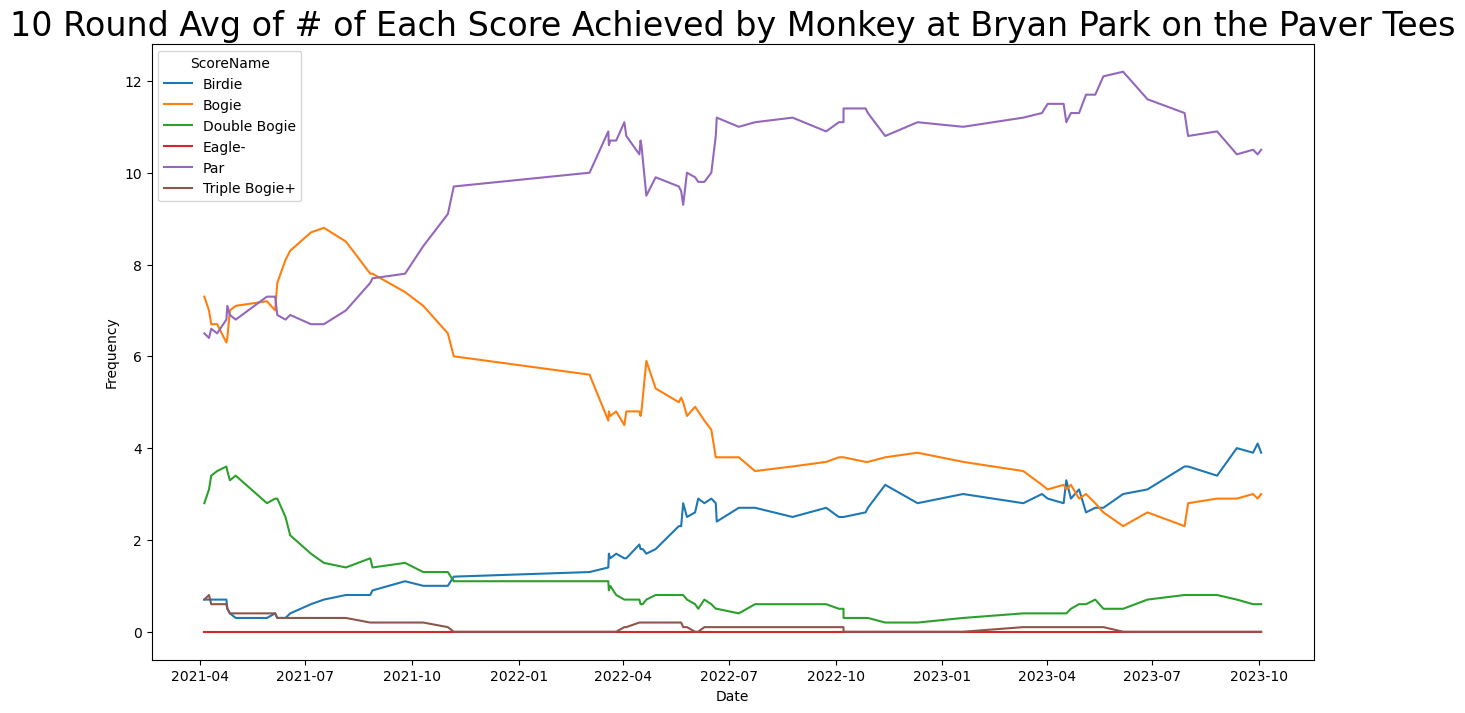

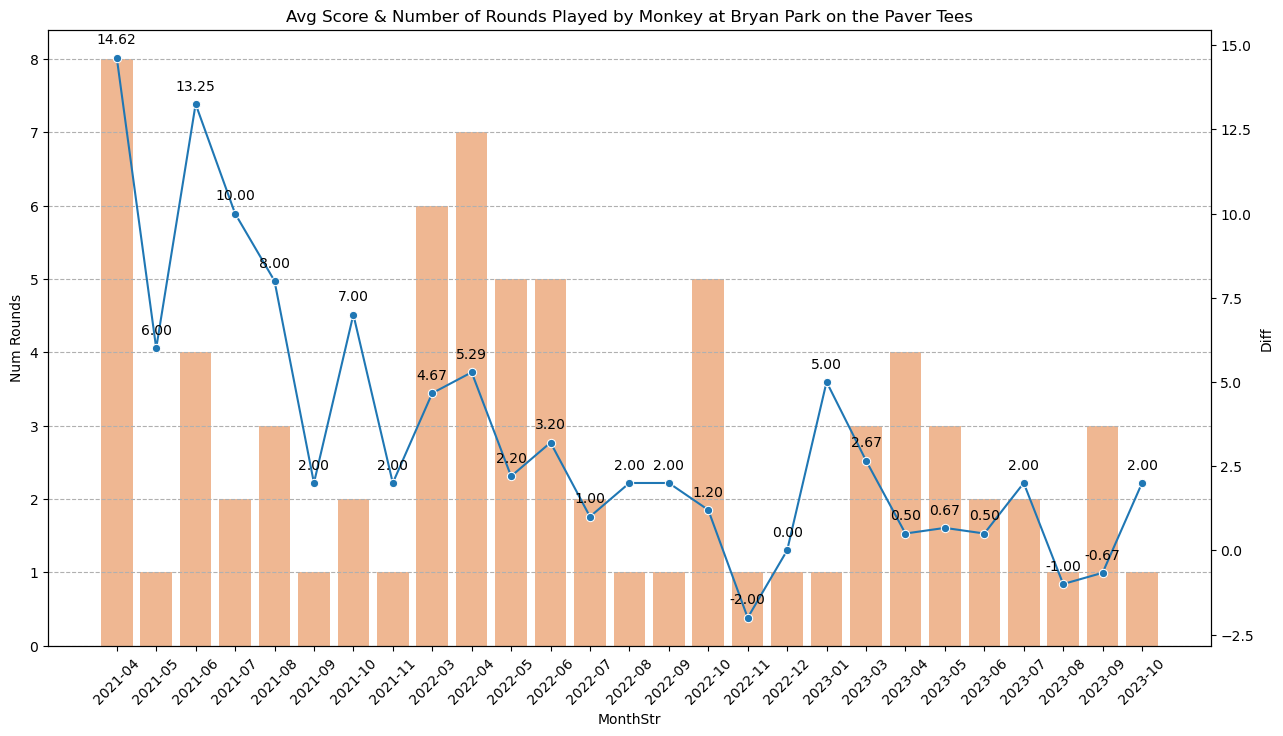

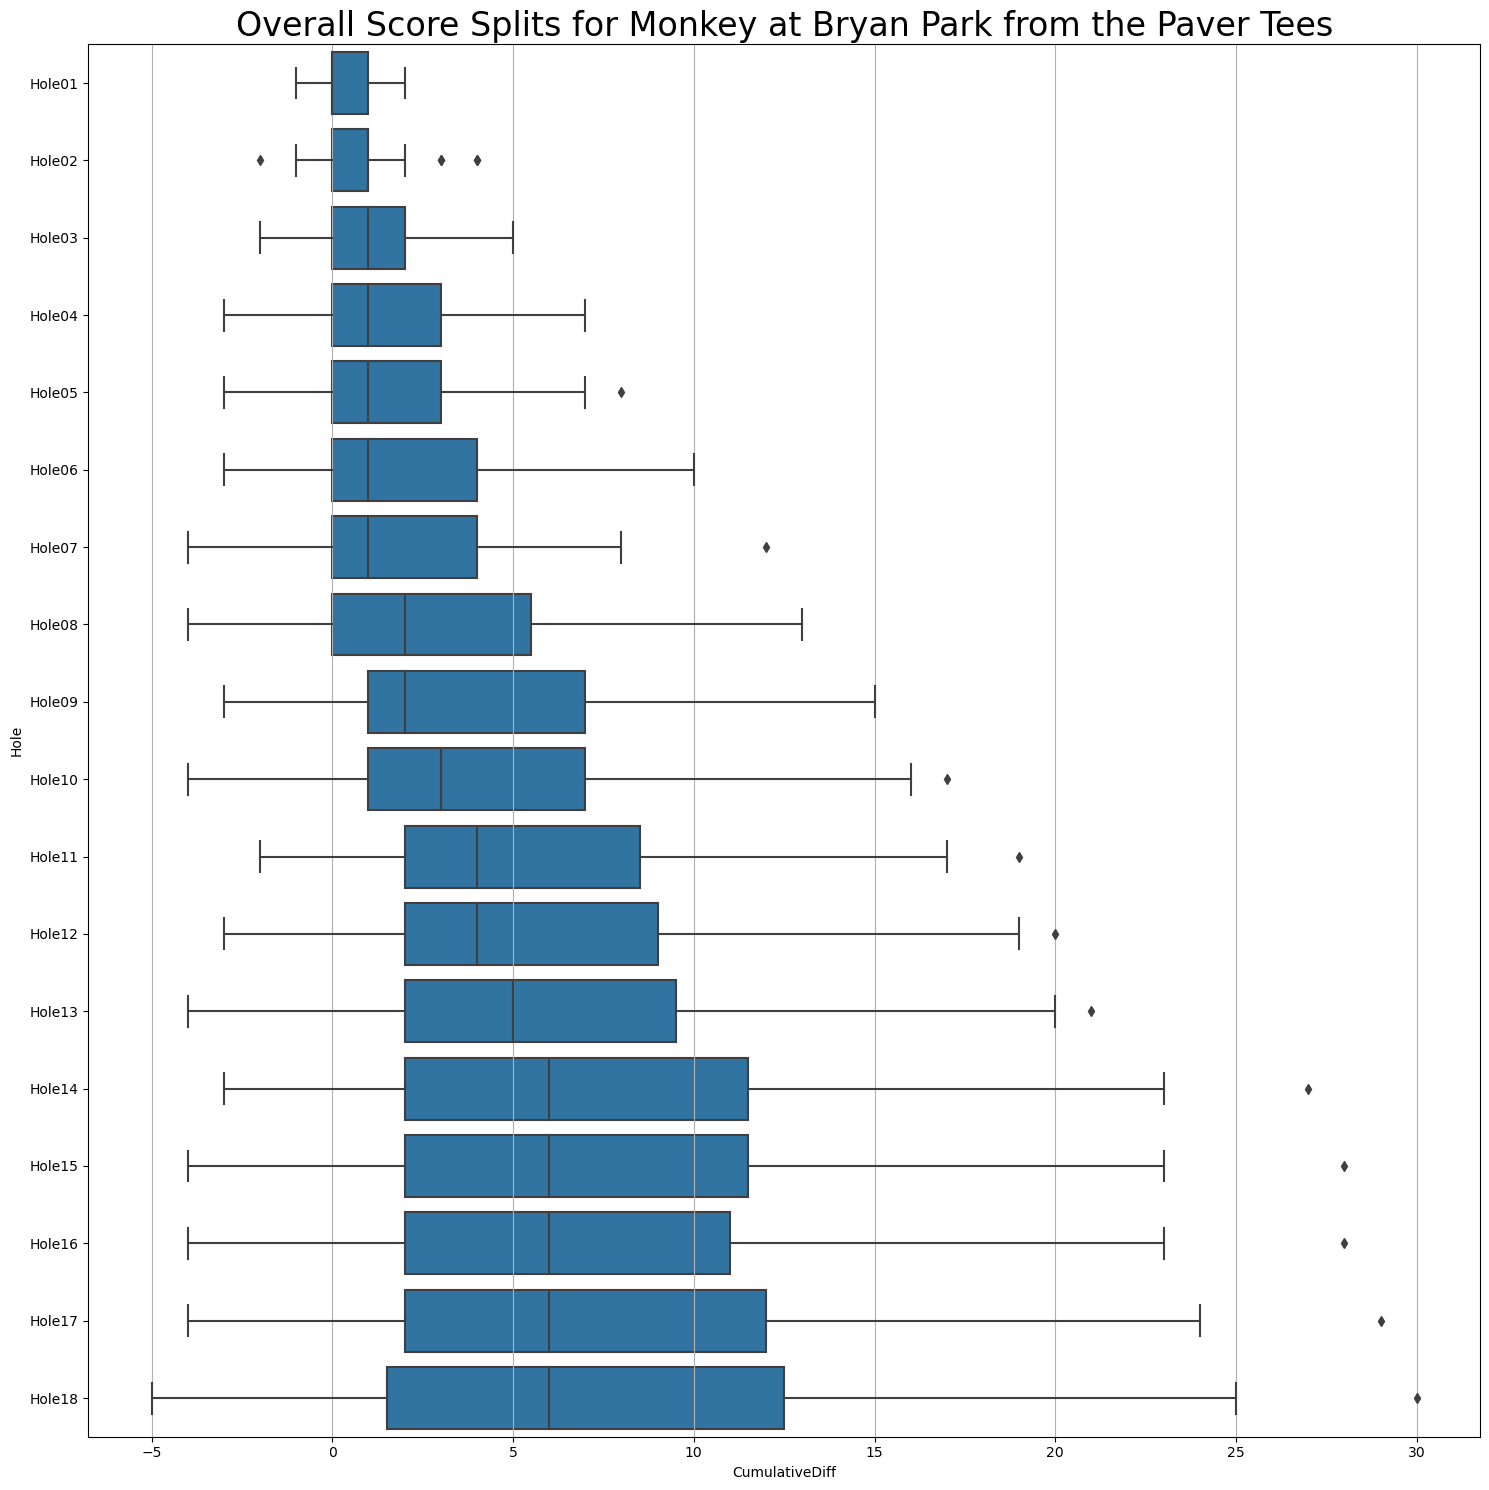

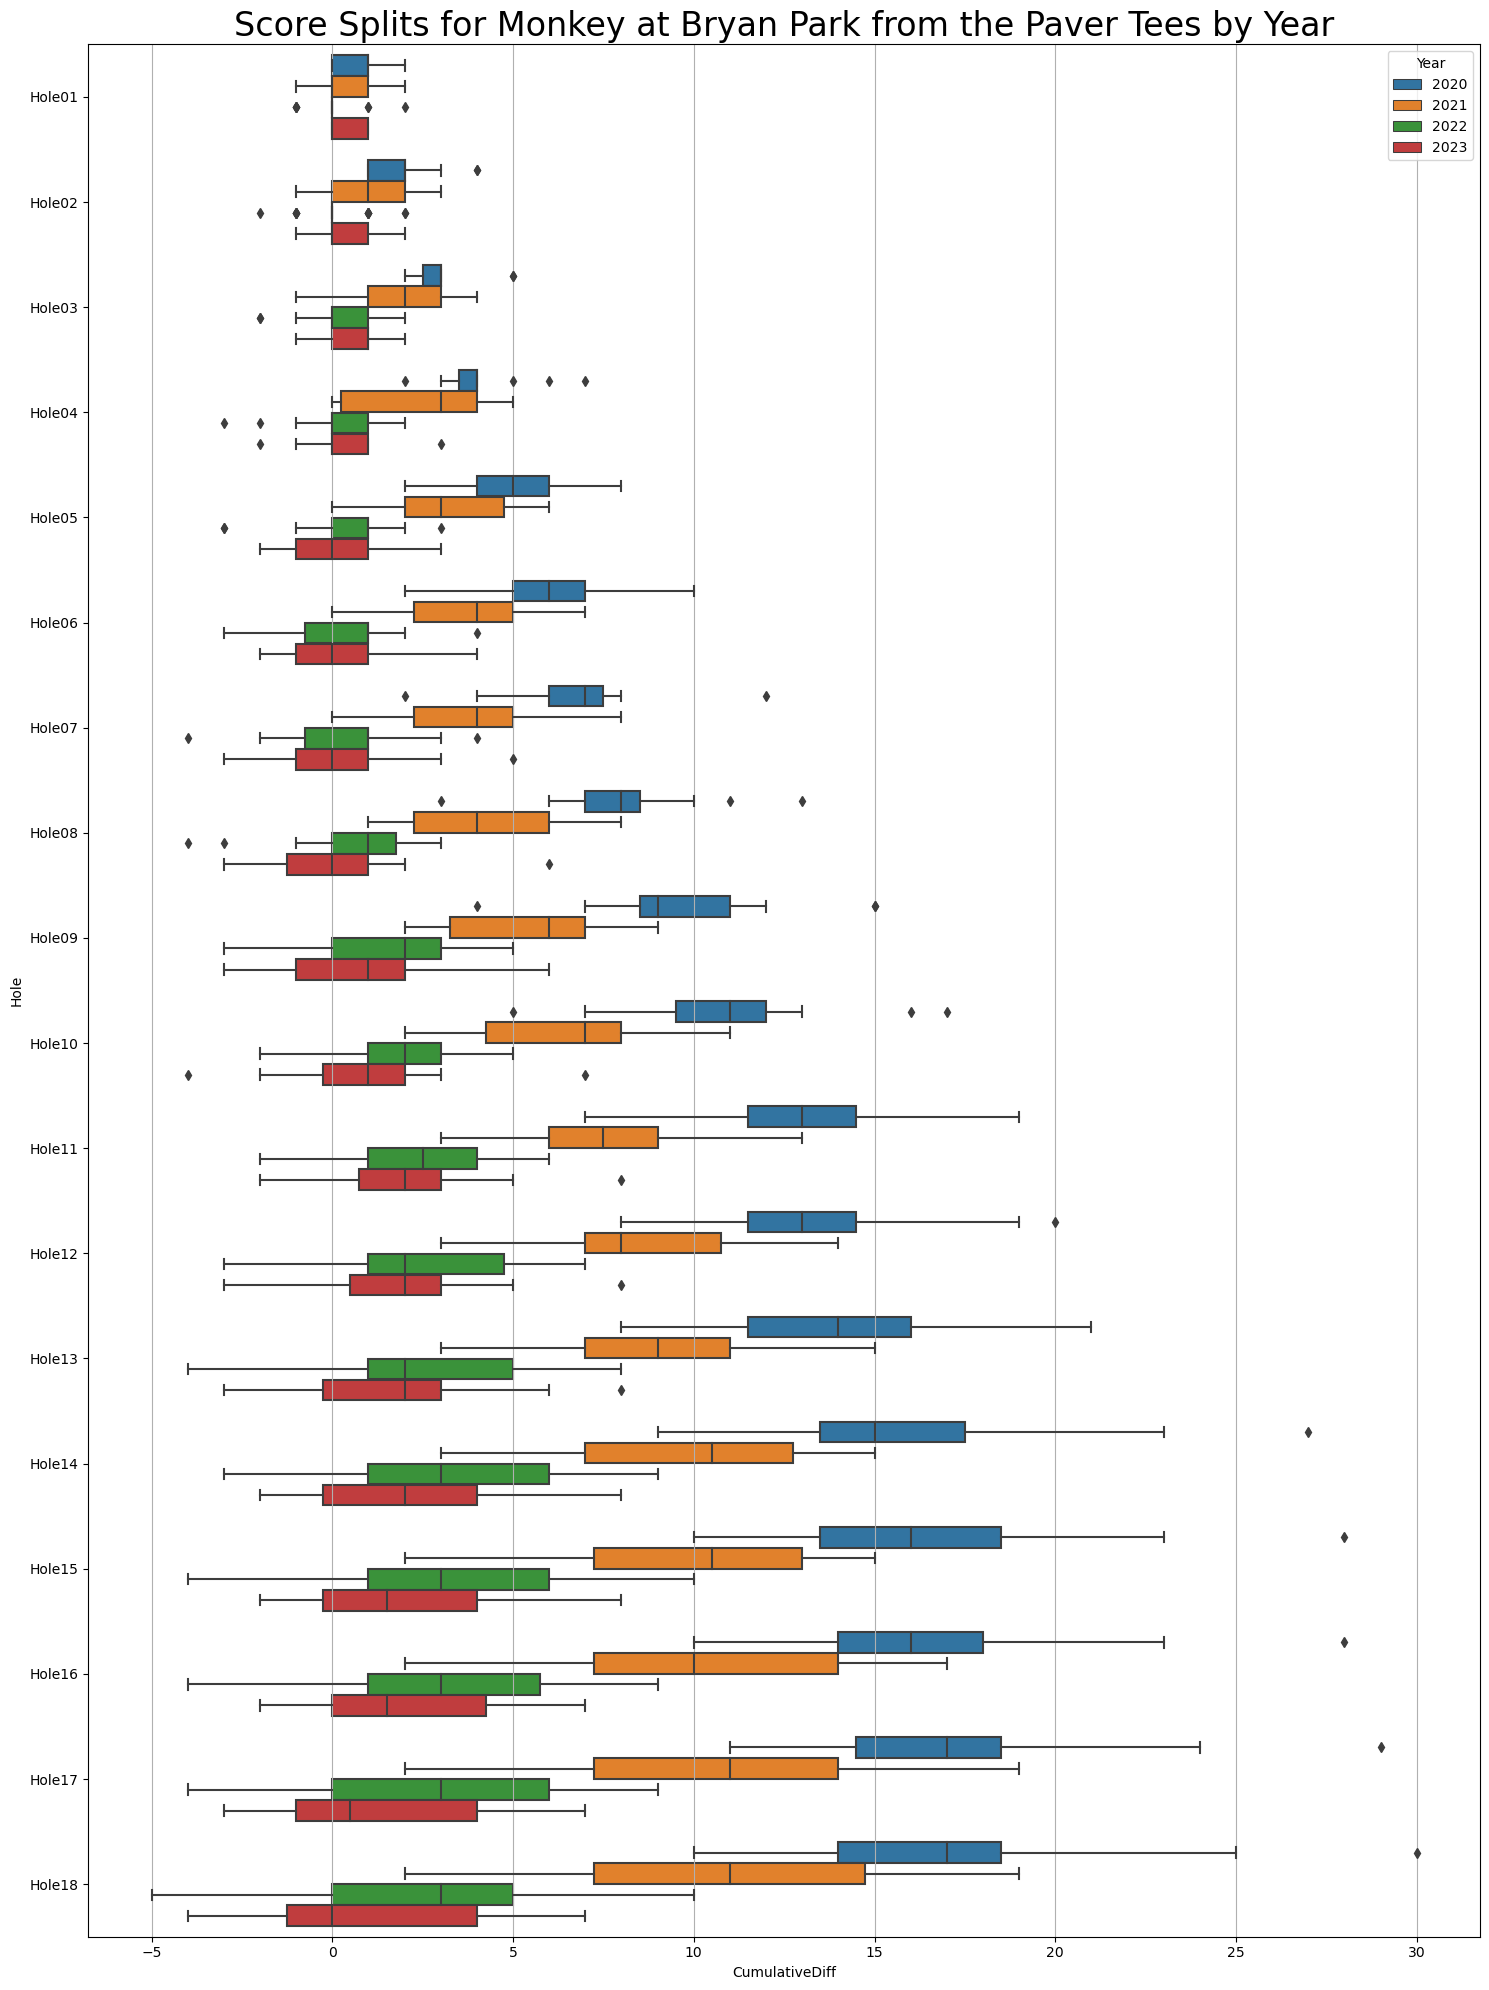

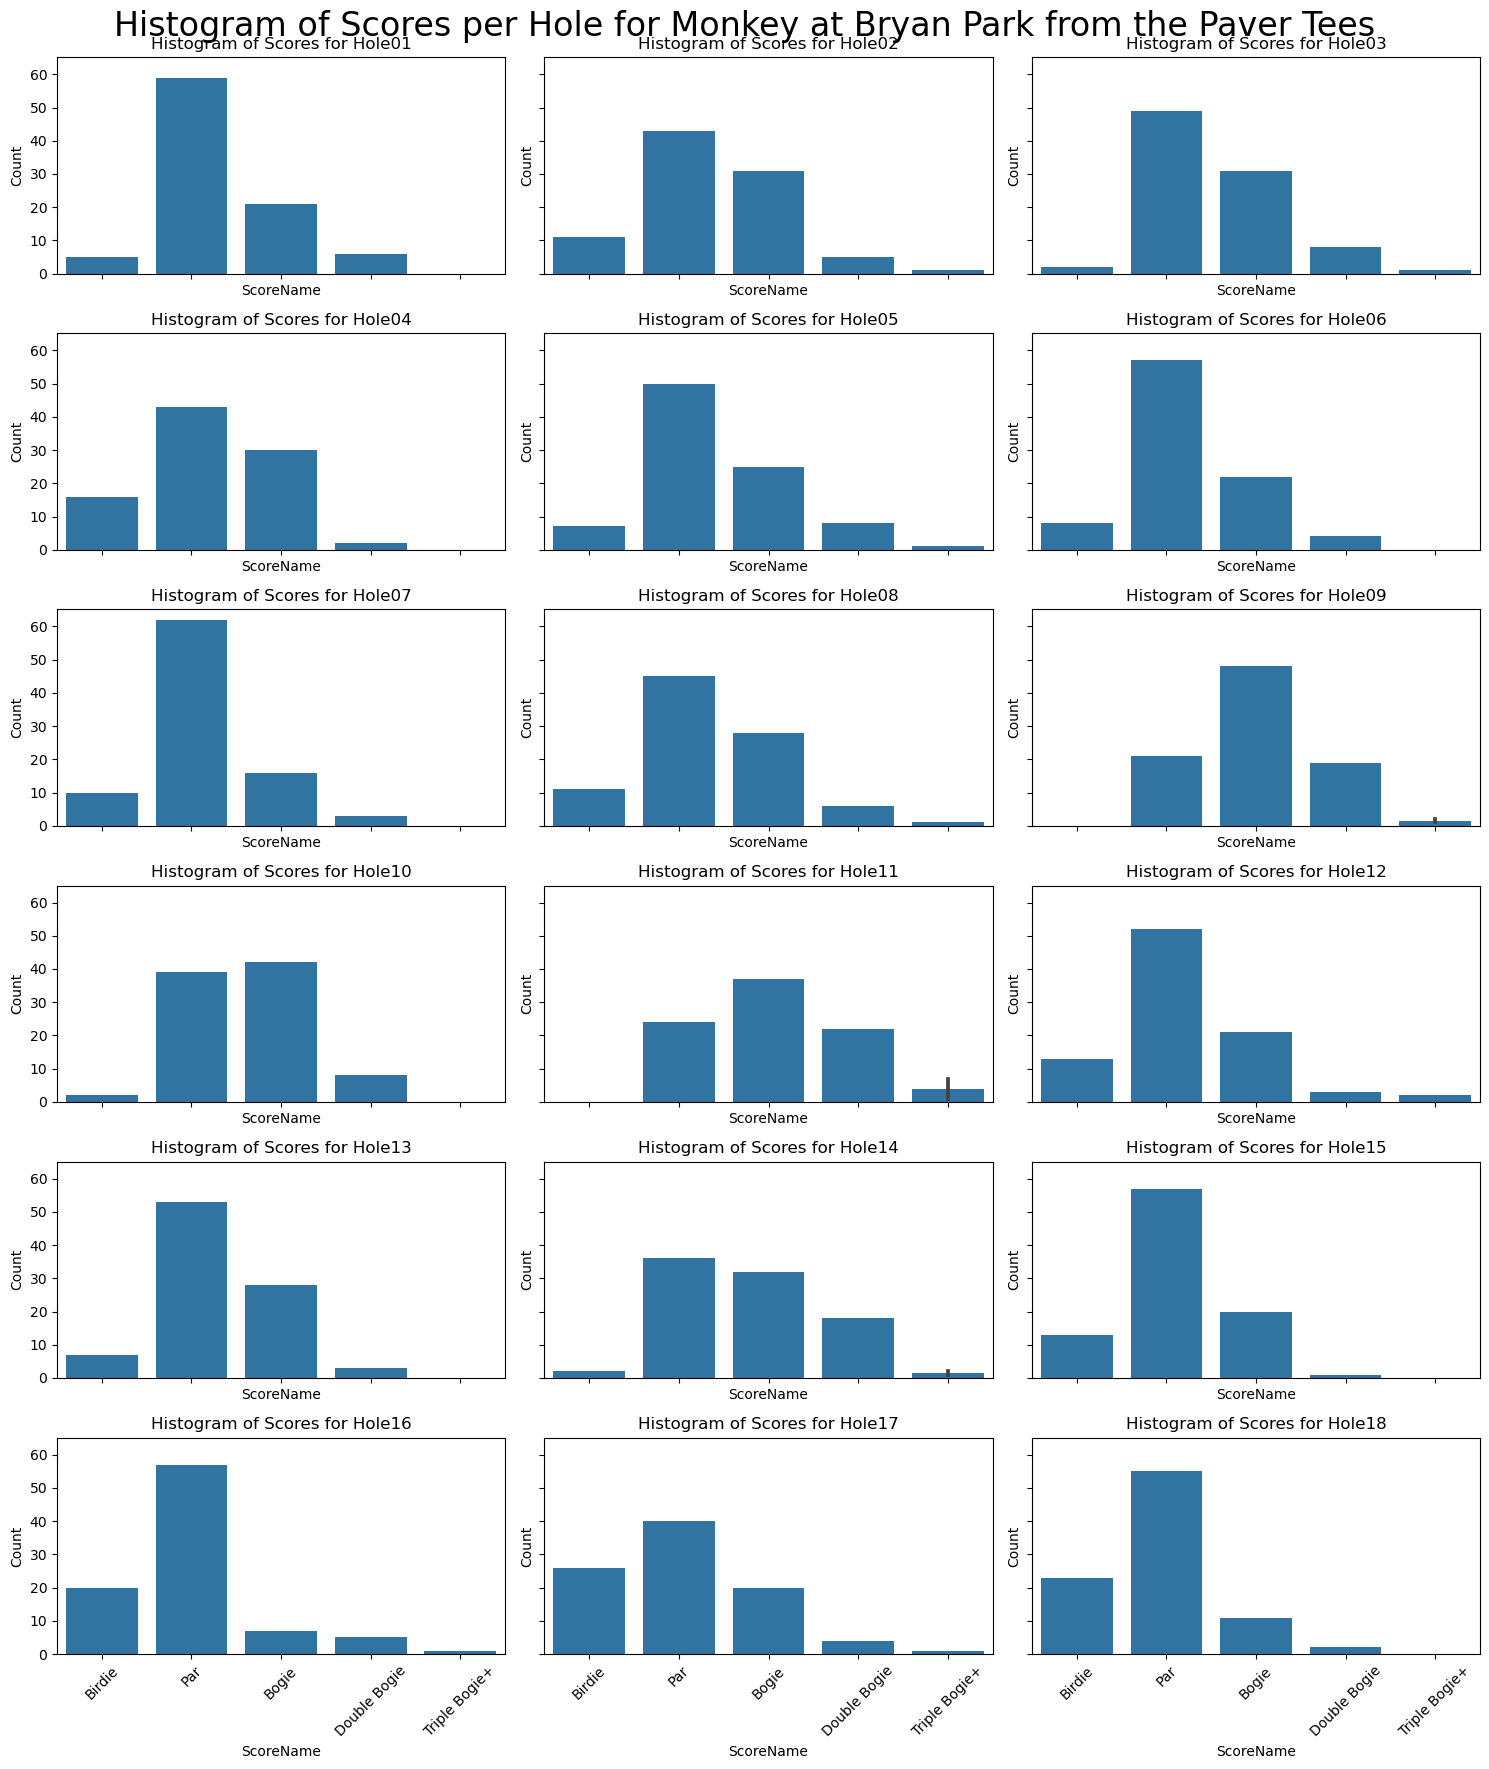

In [20]:
get_player_stats(
    df=df,
    player="Monkey",
    course=course,
    layout=layout,
    min_date=min_date,
    plot_dir="reports/img/",
)

/Users/justinessert/github/projects/udisc_stats/udisc_stats/visualize.py:117: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site-packages/calmap/__init__.py:202: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site-packages/calmap/__init__.py:206: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site-packages/calmap/__init__.py:202: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site

/Users/justinessert/github/projects/udisc_stats/udisc_stats/visualize.py:136: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



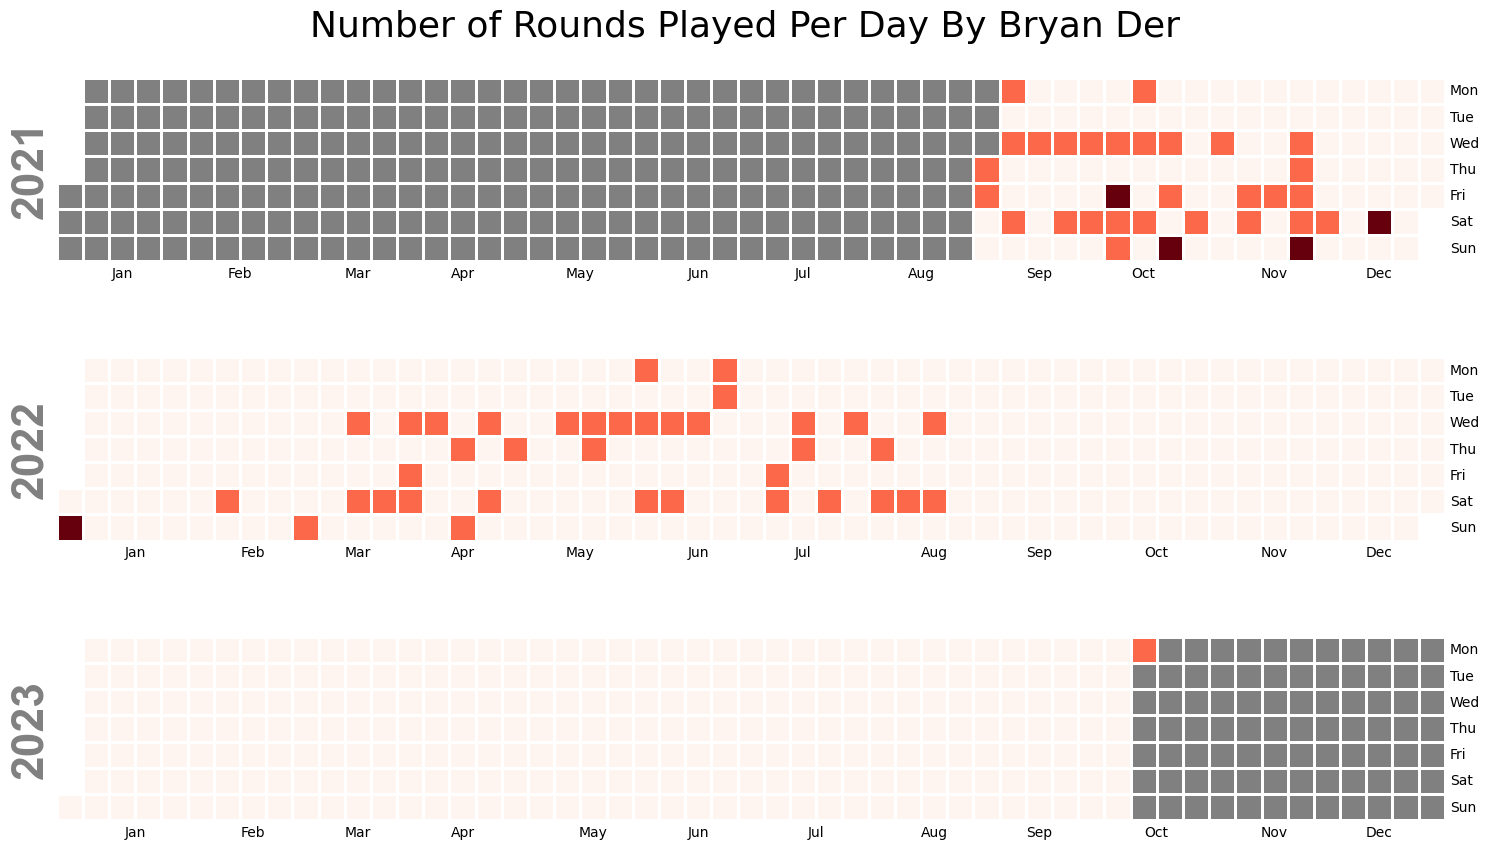

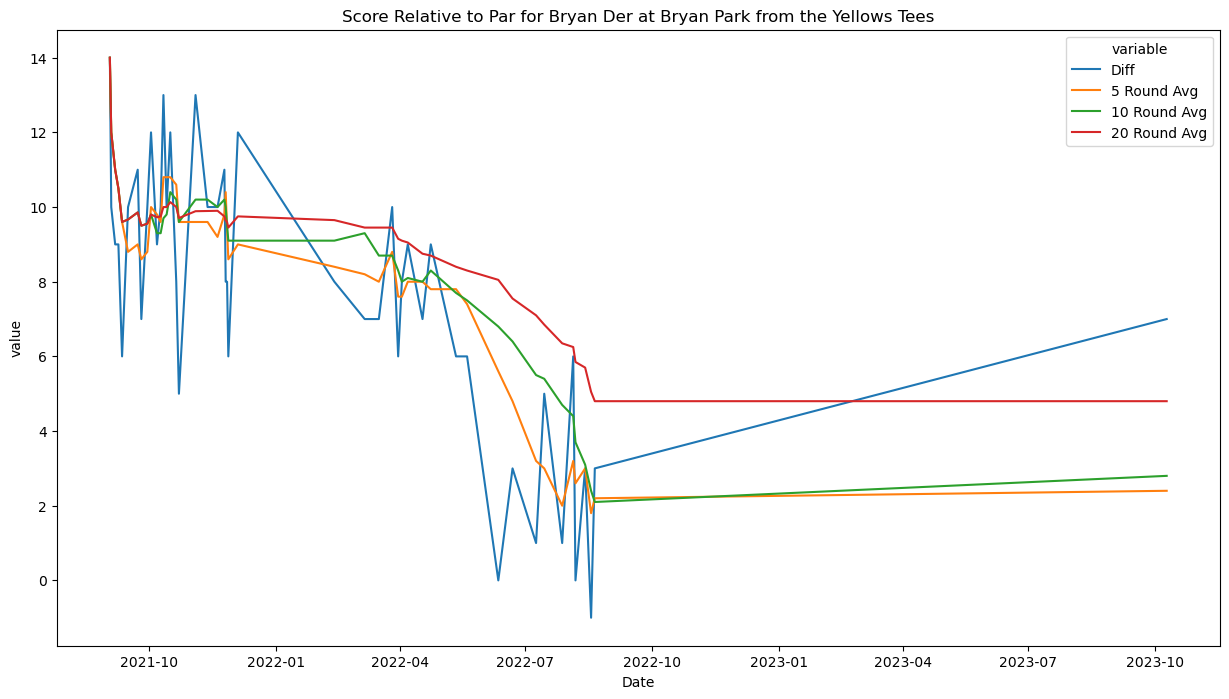

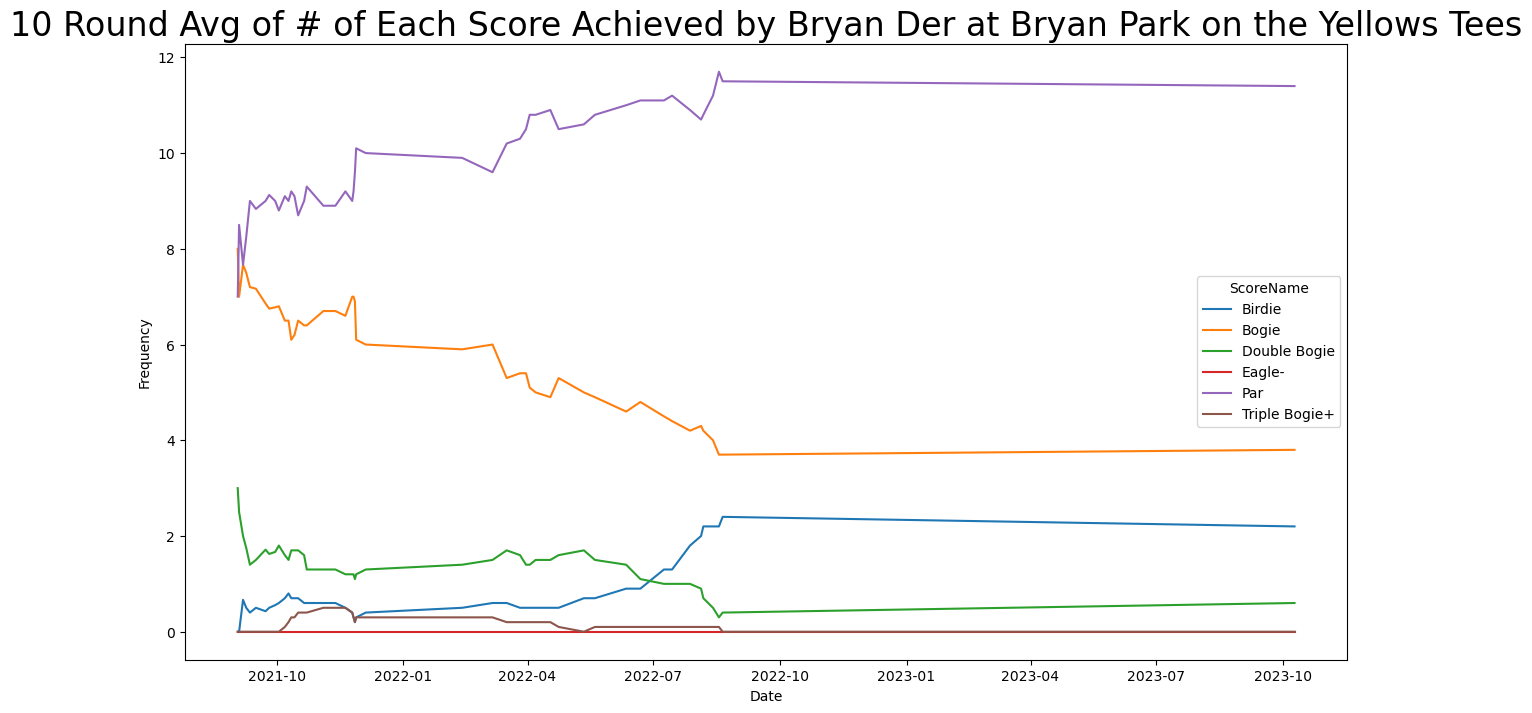

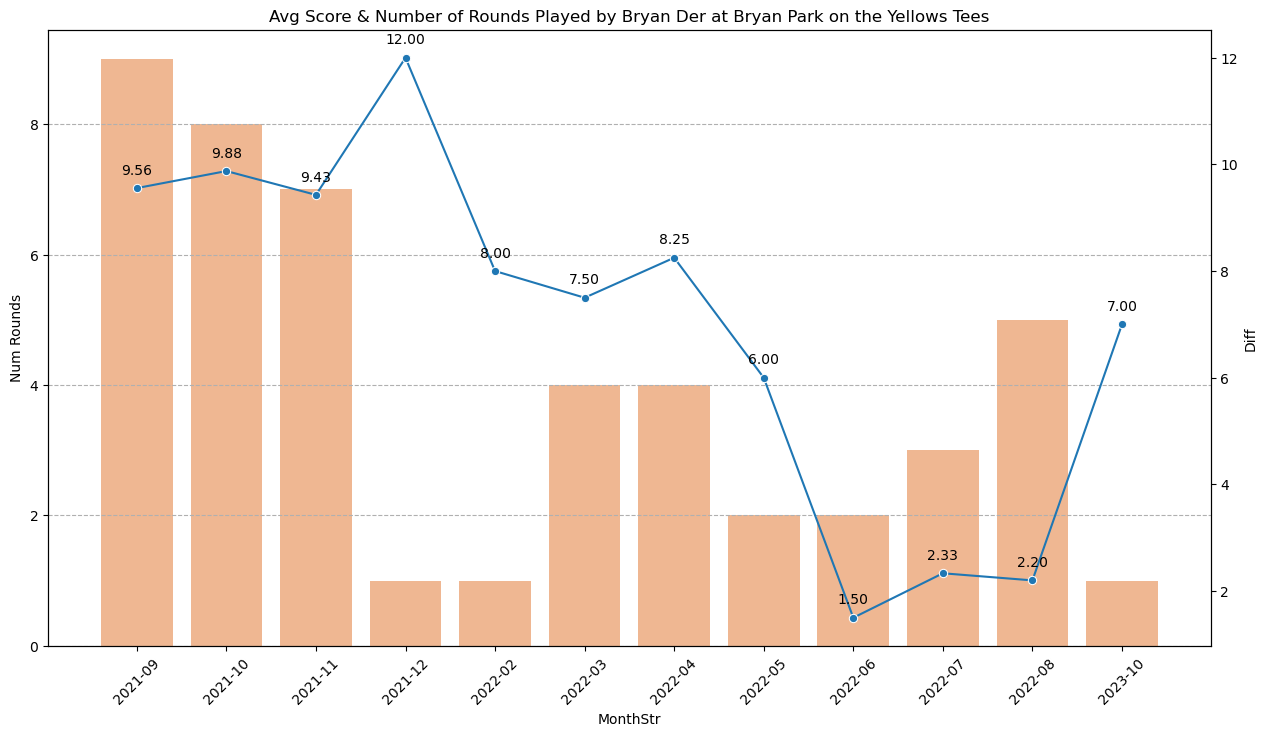

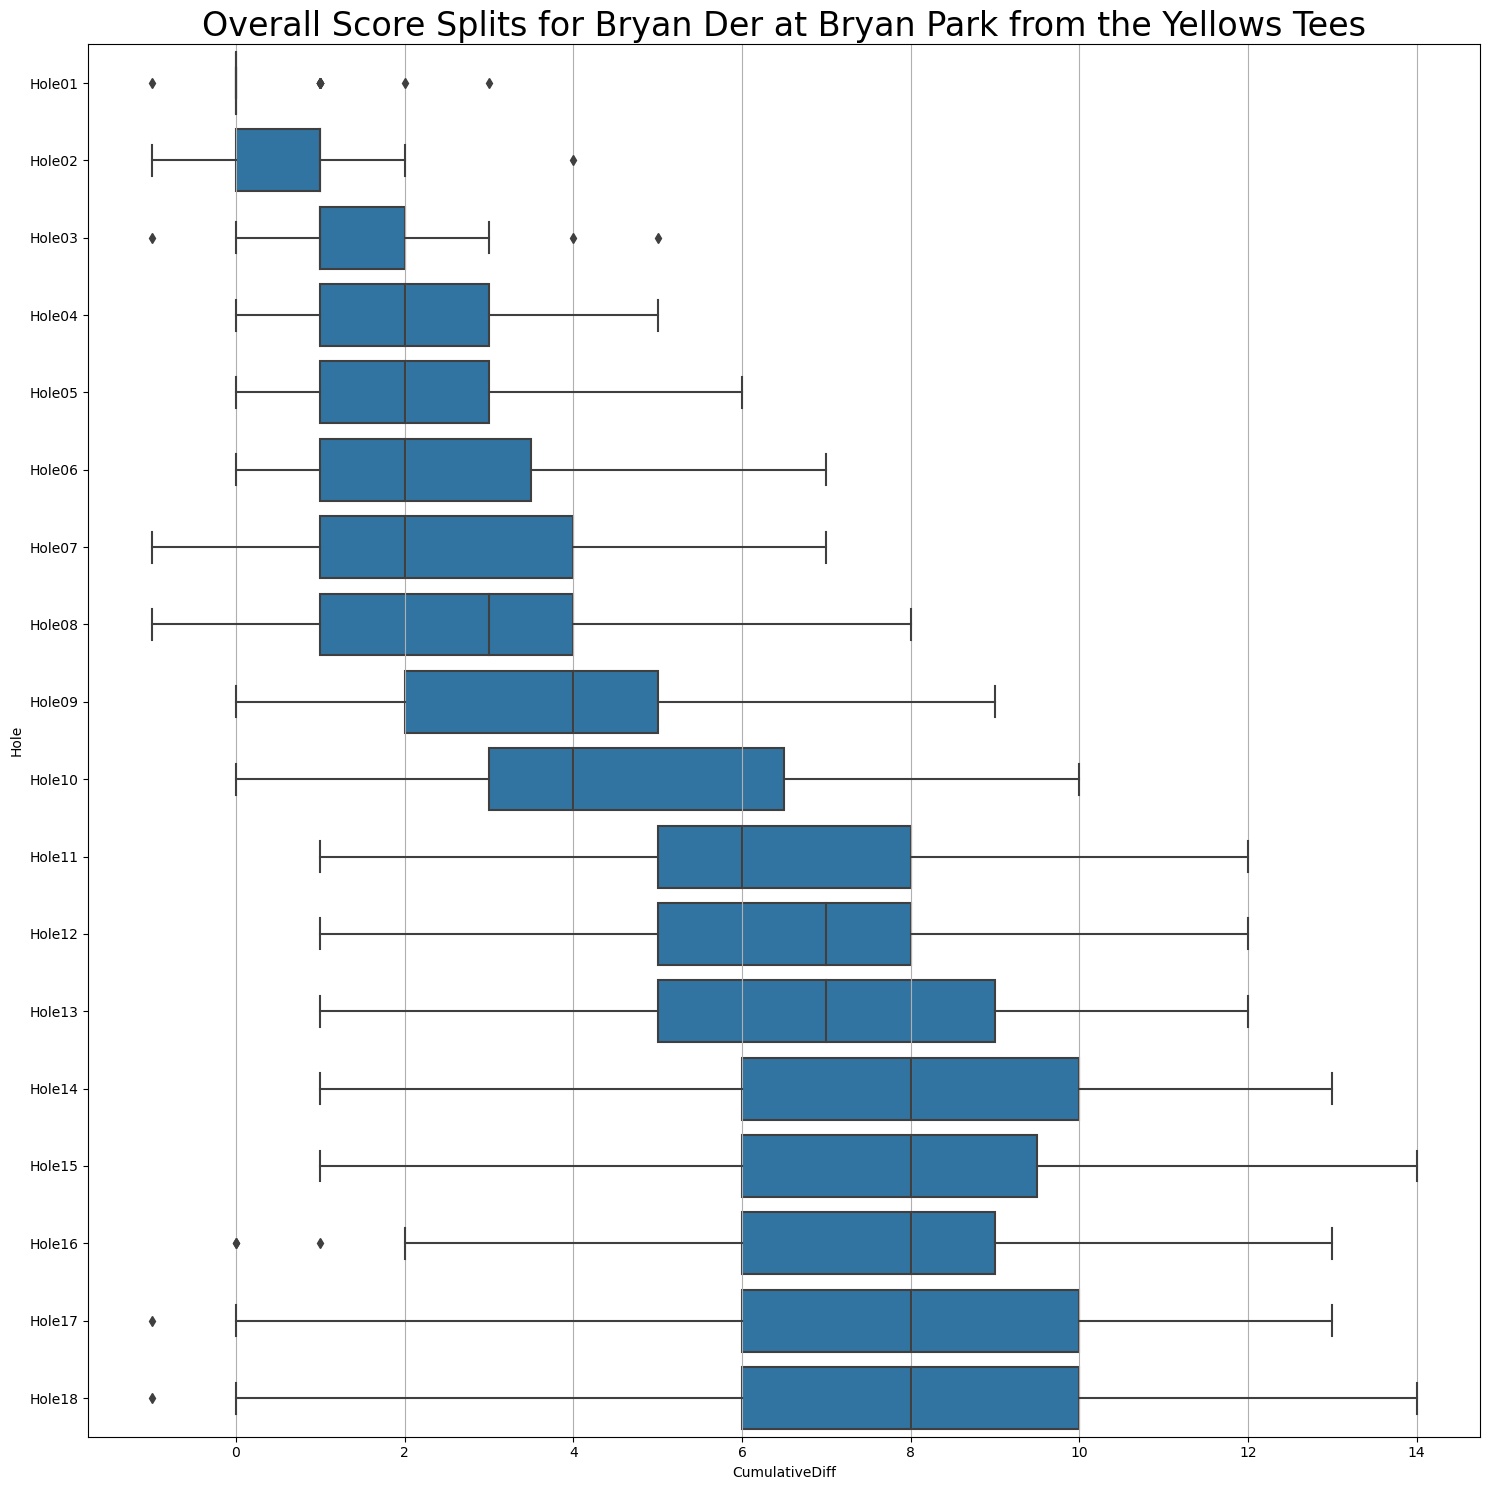

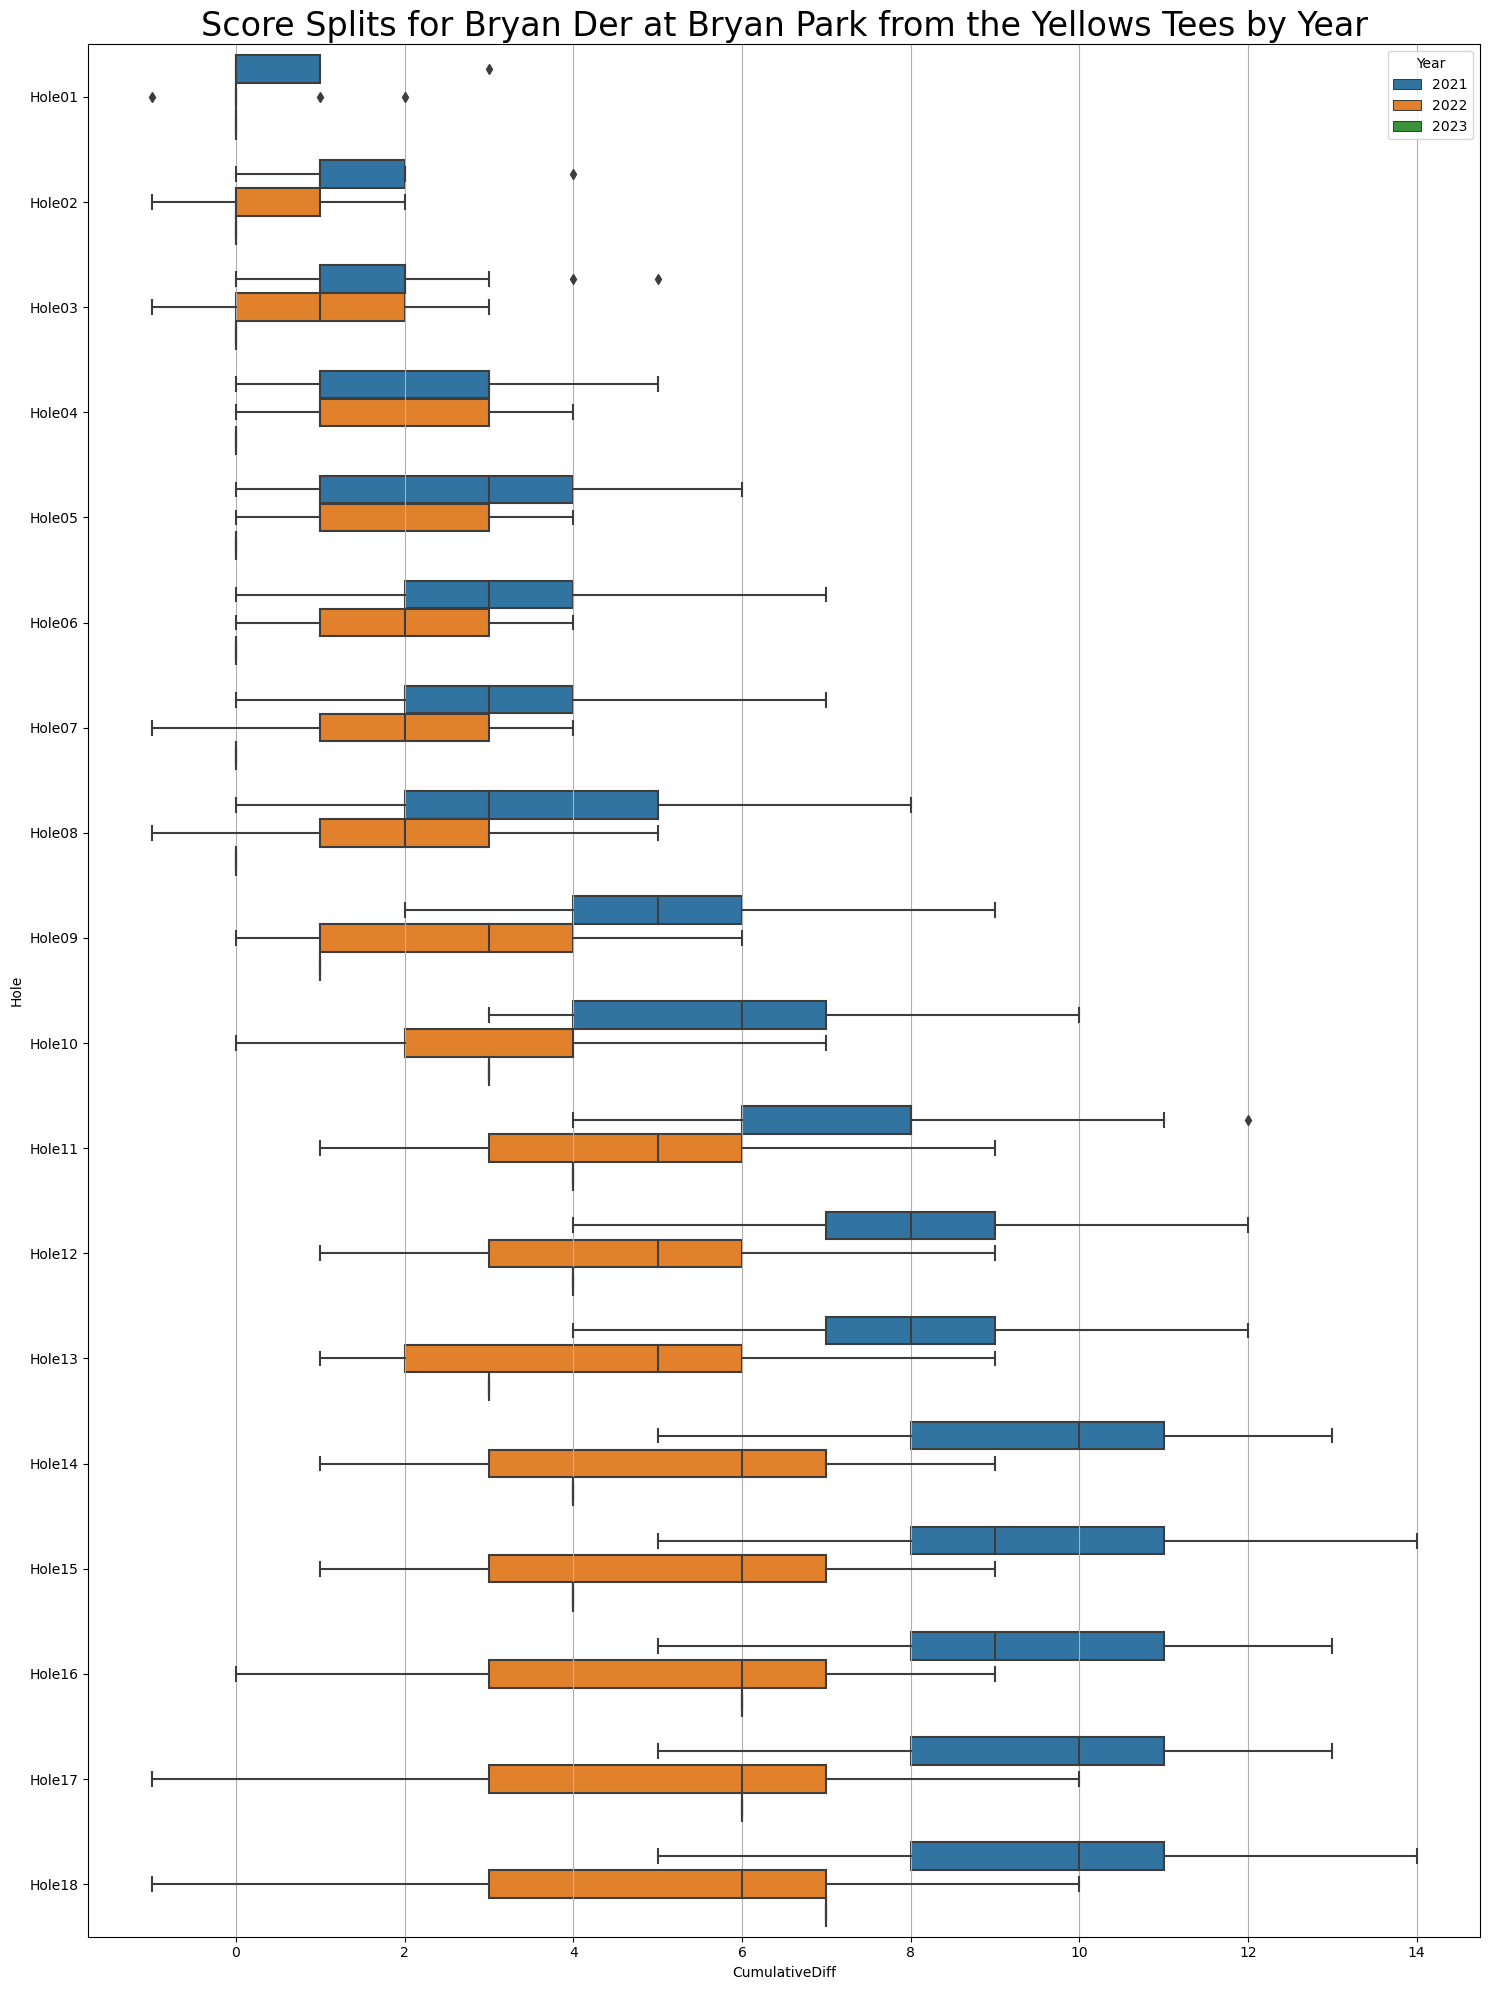

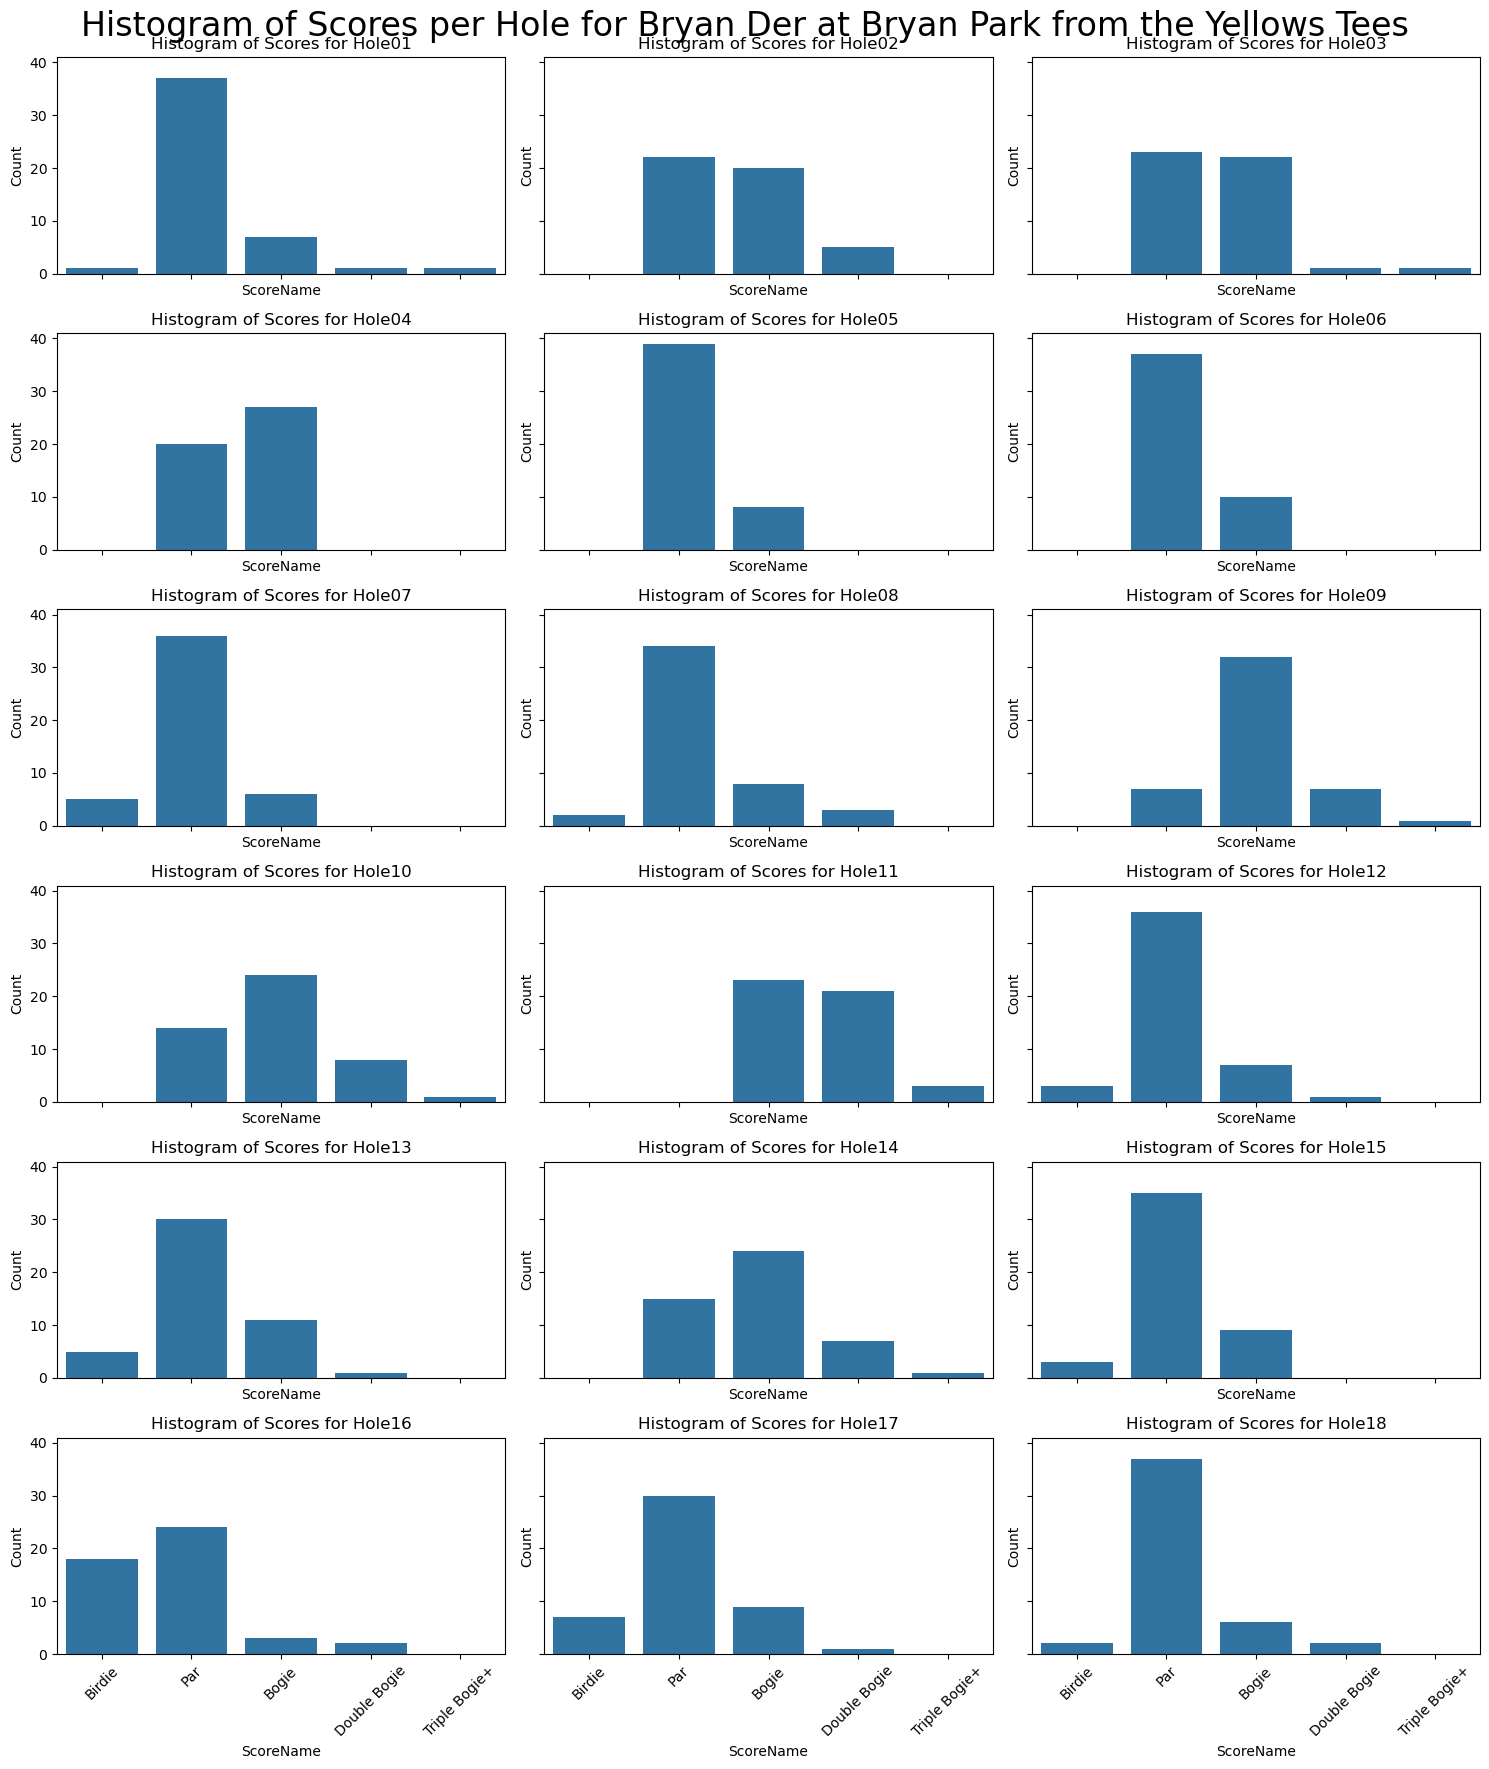

In [9]:
get_player_stats(
    df=df,
    player="Bryan Der",
    course=course,
    layout=layout,
    min_date=min_date
)

/Users/justinessert/github/projects/udisc_stats/udisc_stats/visualize.py:117: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site-packages/calmap/__init__.py:202: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site-packages/calmap/__init__.py:206: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site-packages/calmap/__init__.py:202: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

/opt/homebrew/Caskroom/miniconda/base/envs/general/lib/python3.9/site

/Users/justinessert/github/projects/udisc_stats/udisc_stats/visualize.py:136: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



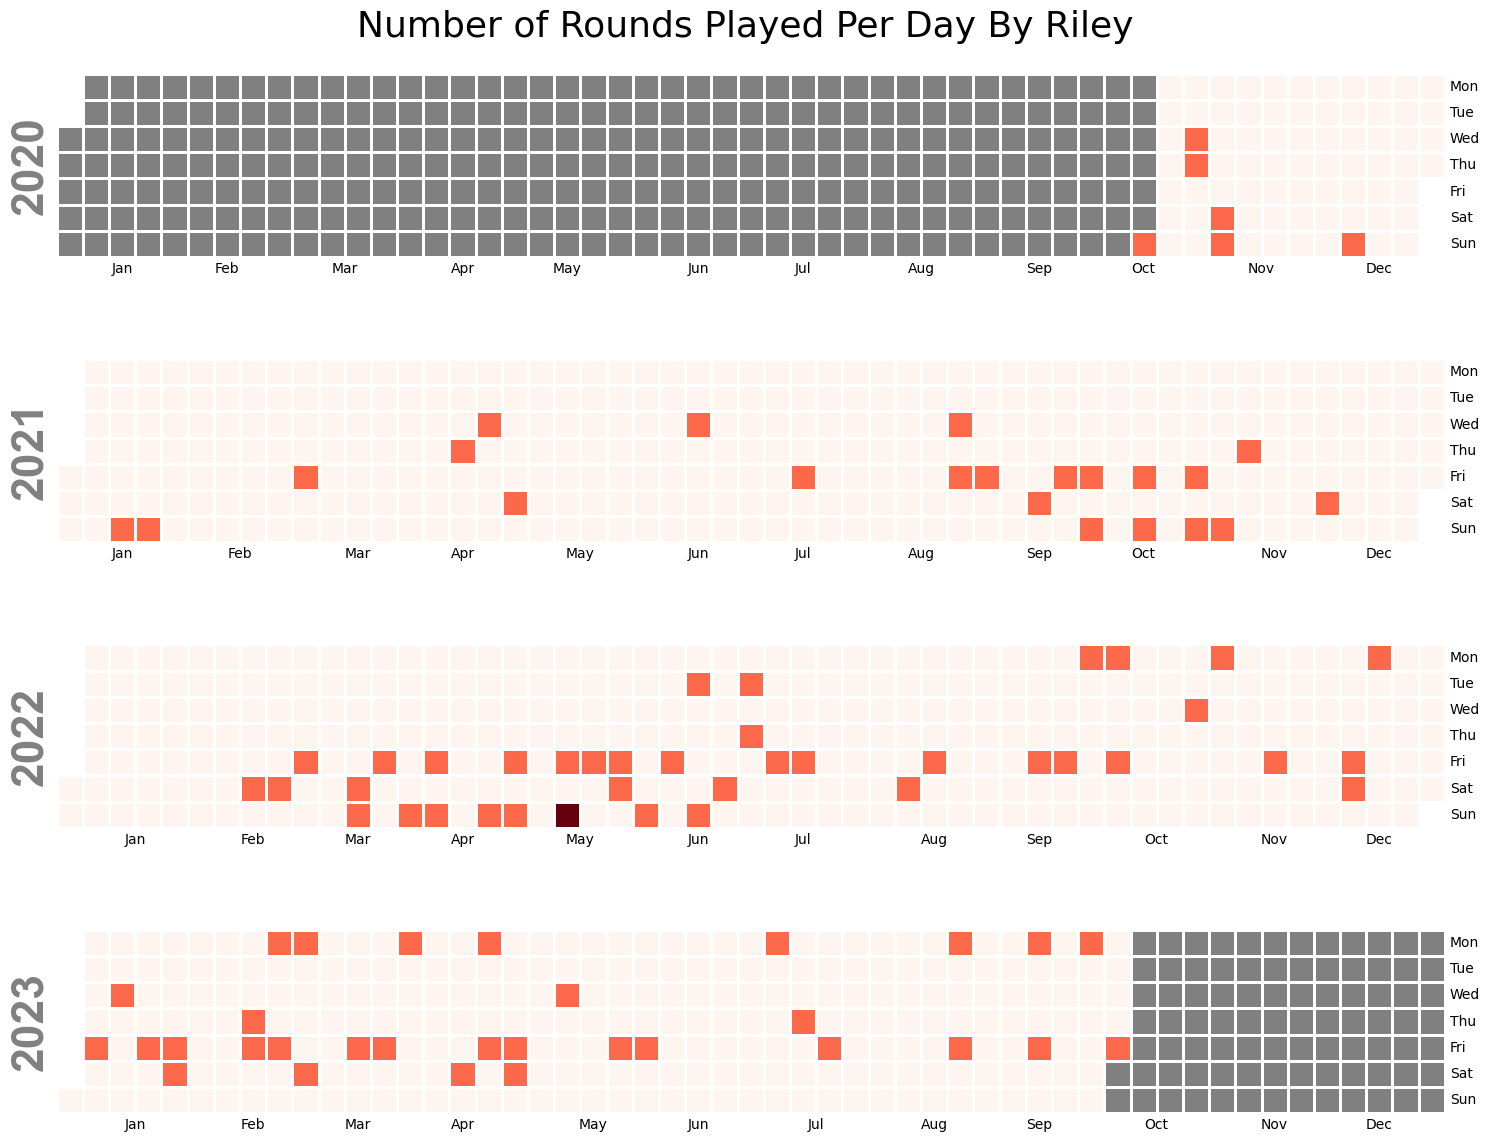

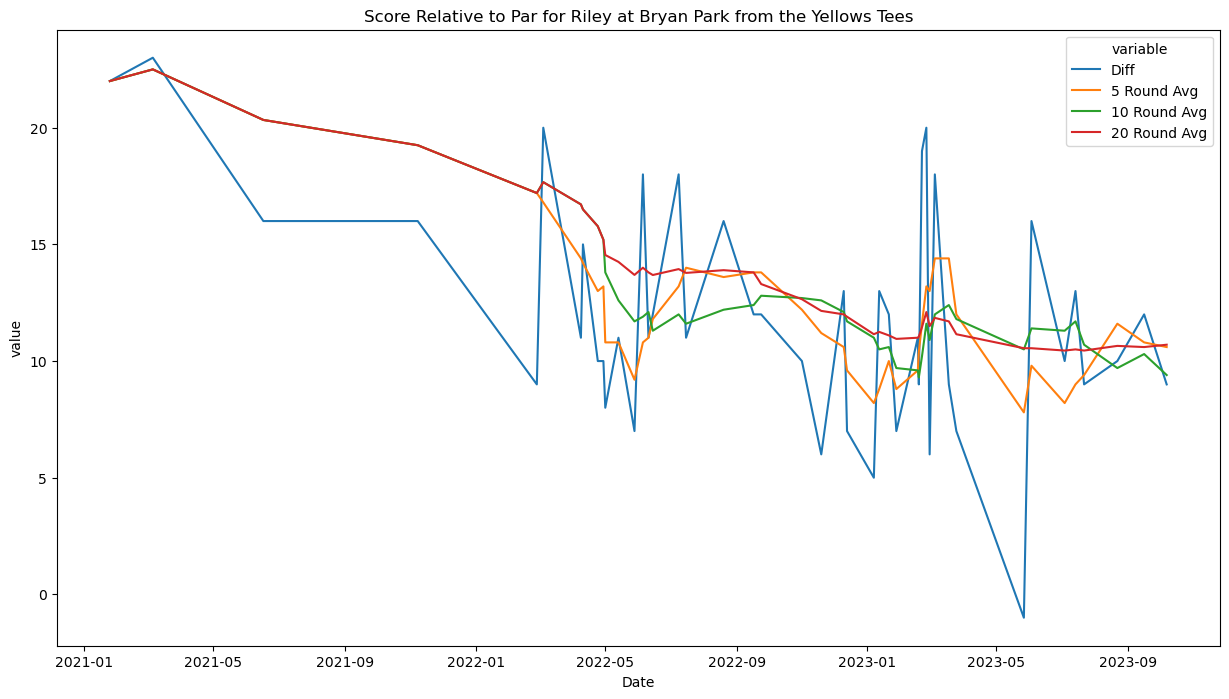

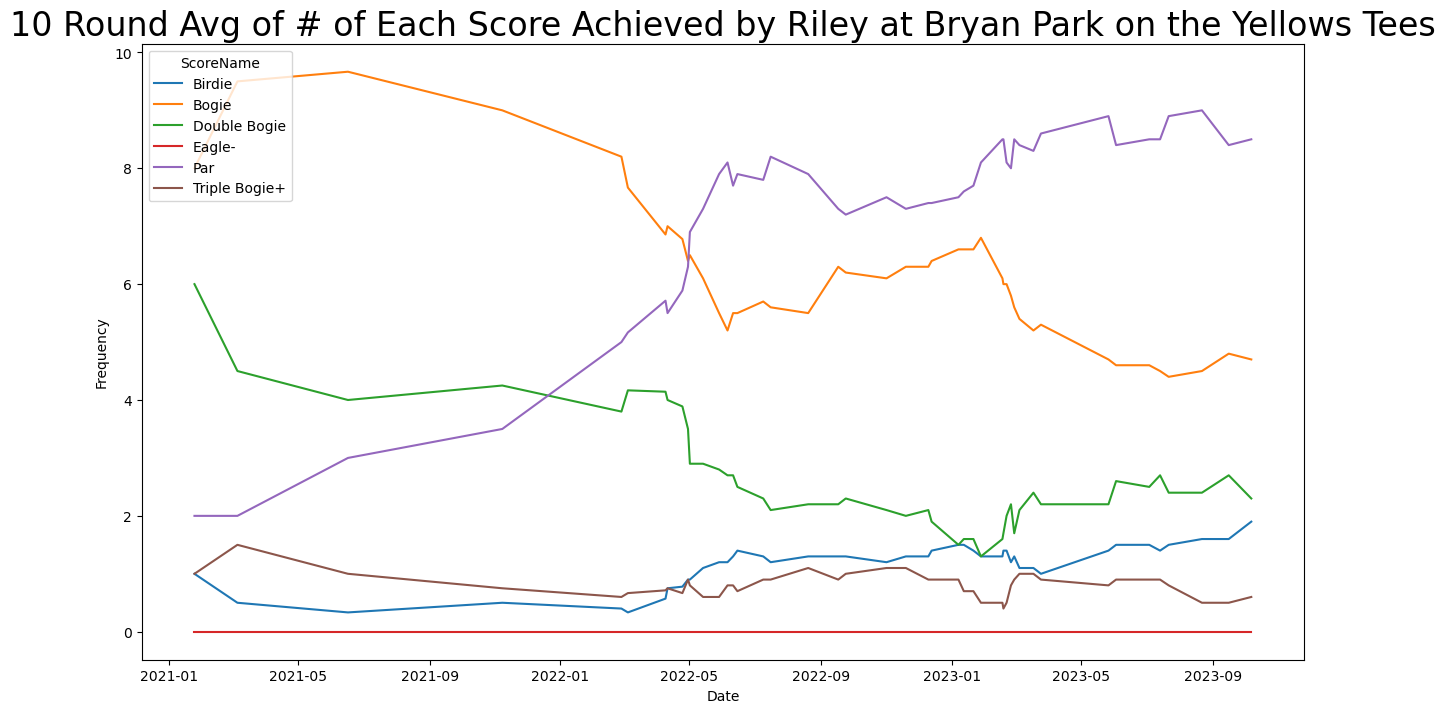

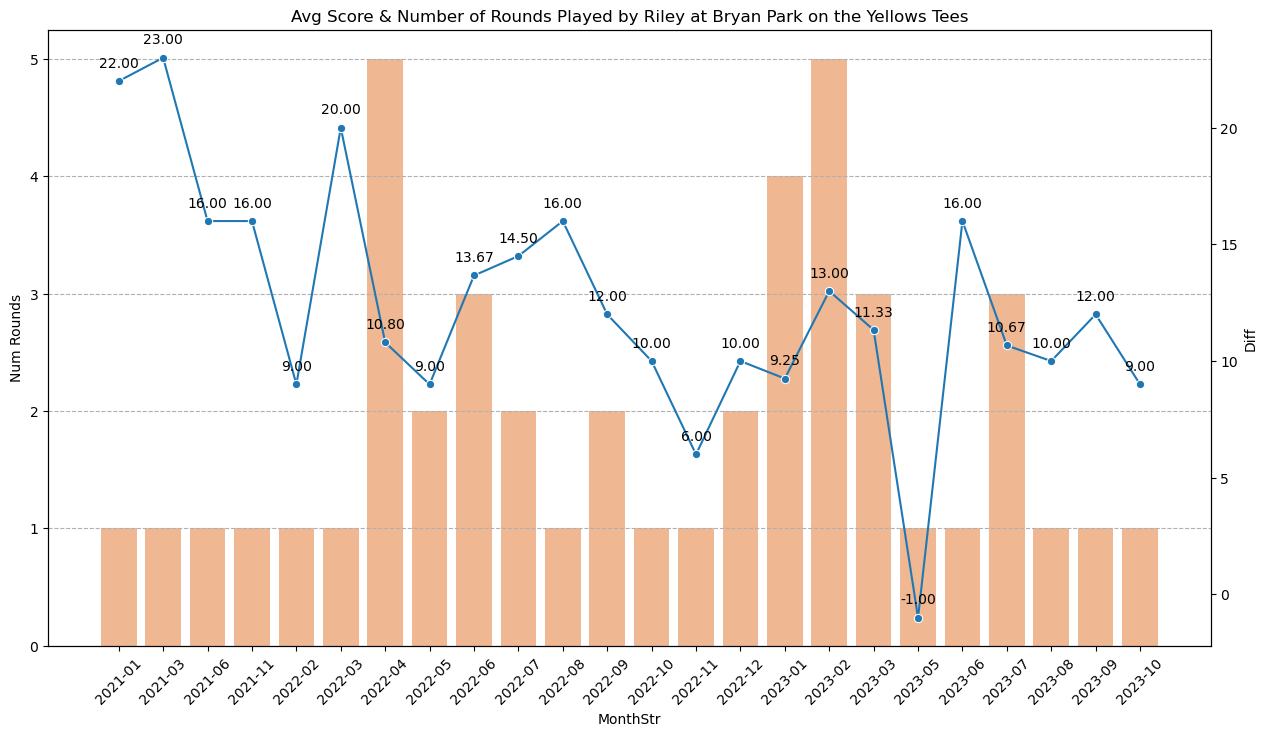

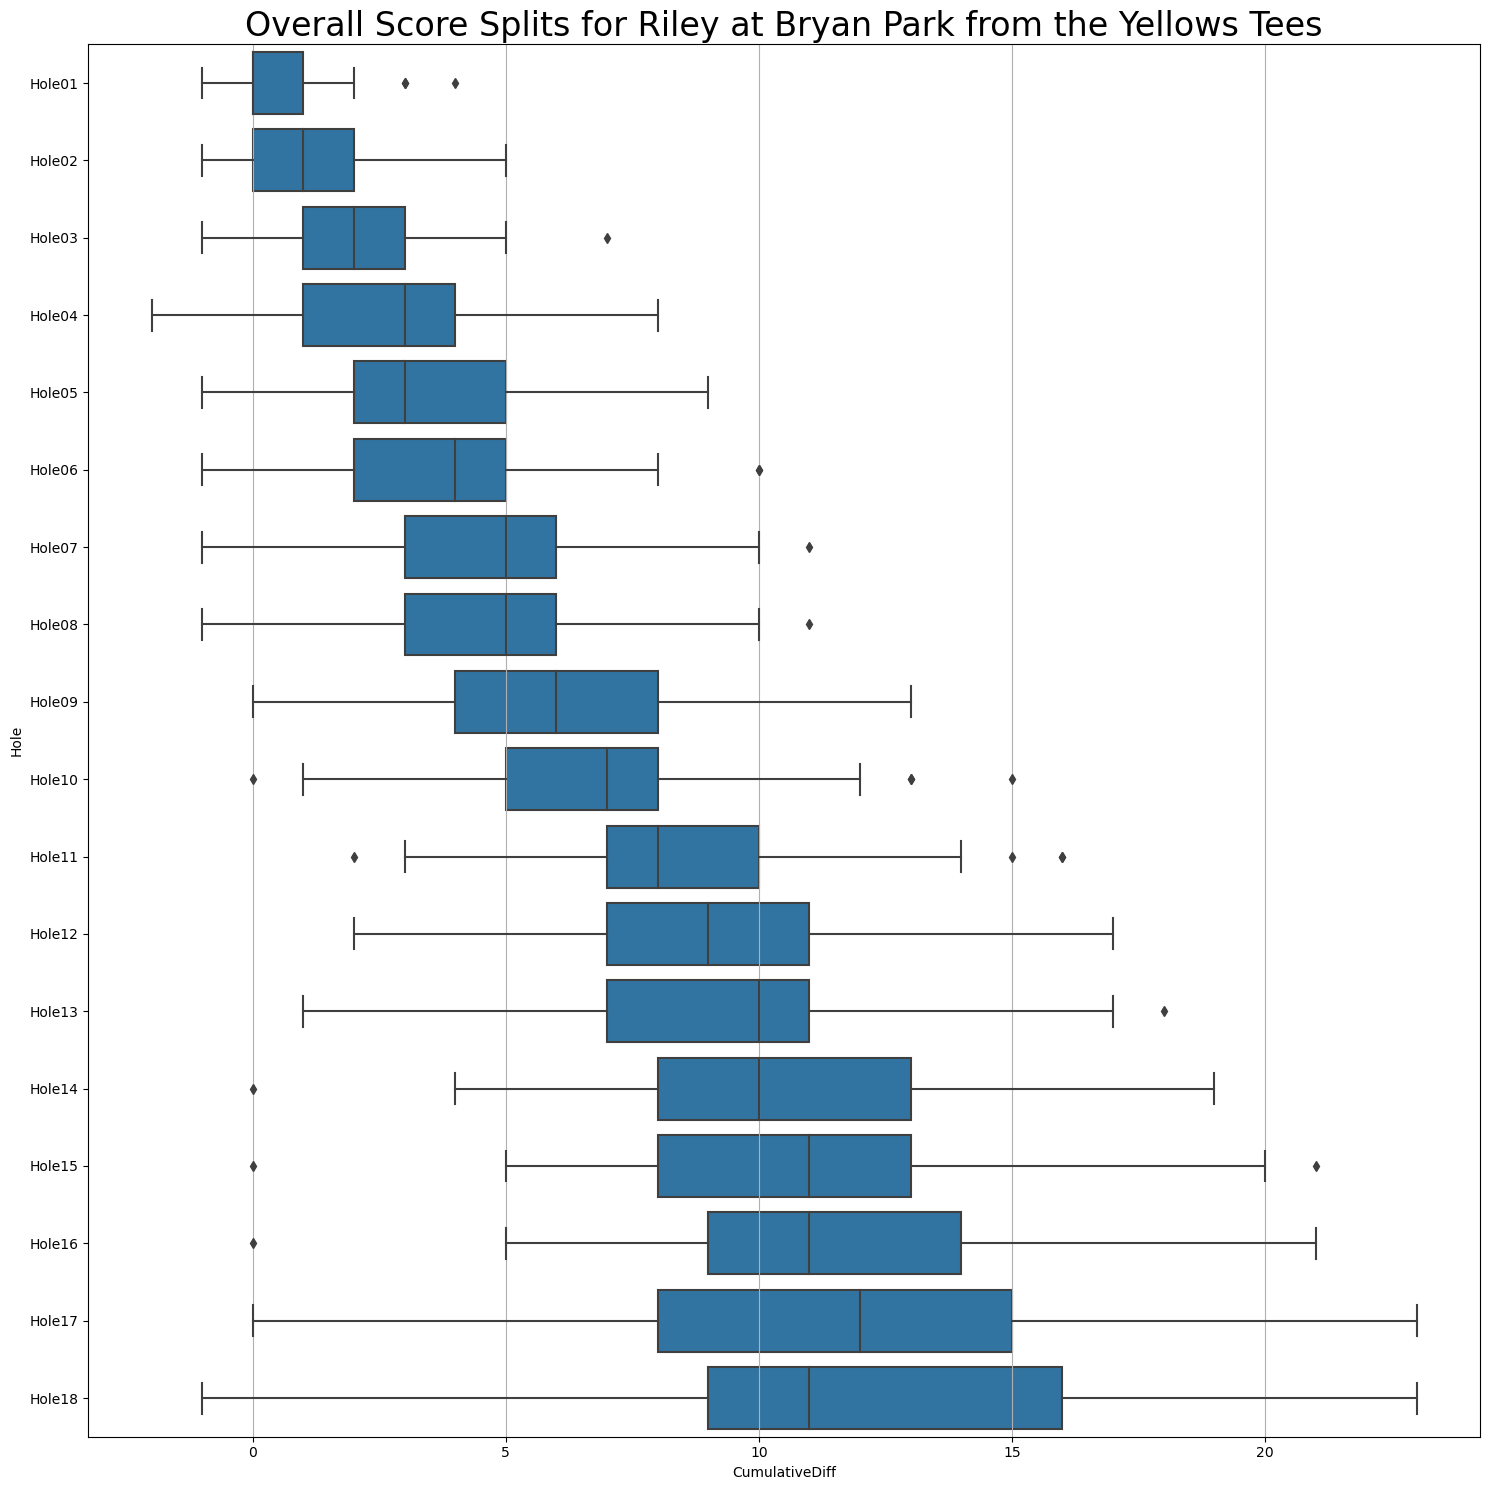

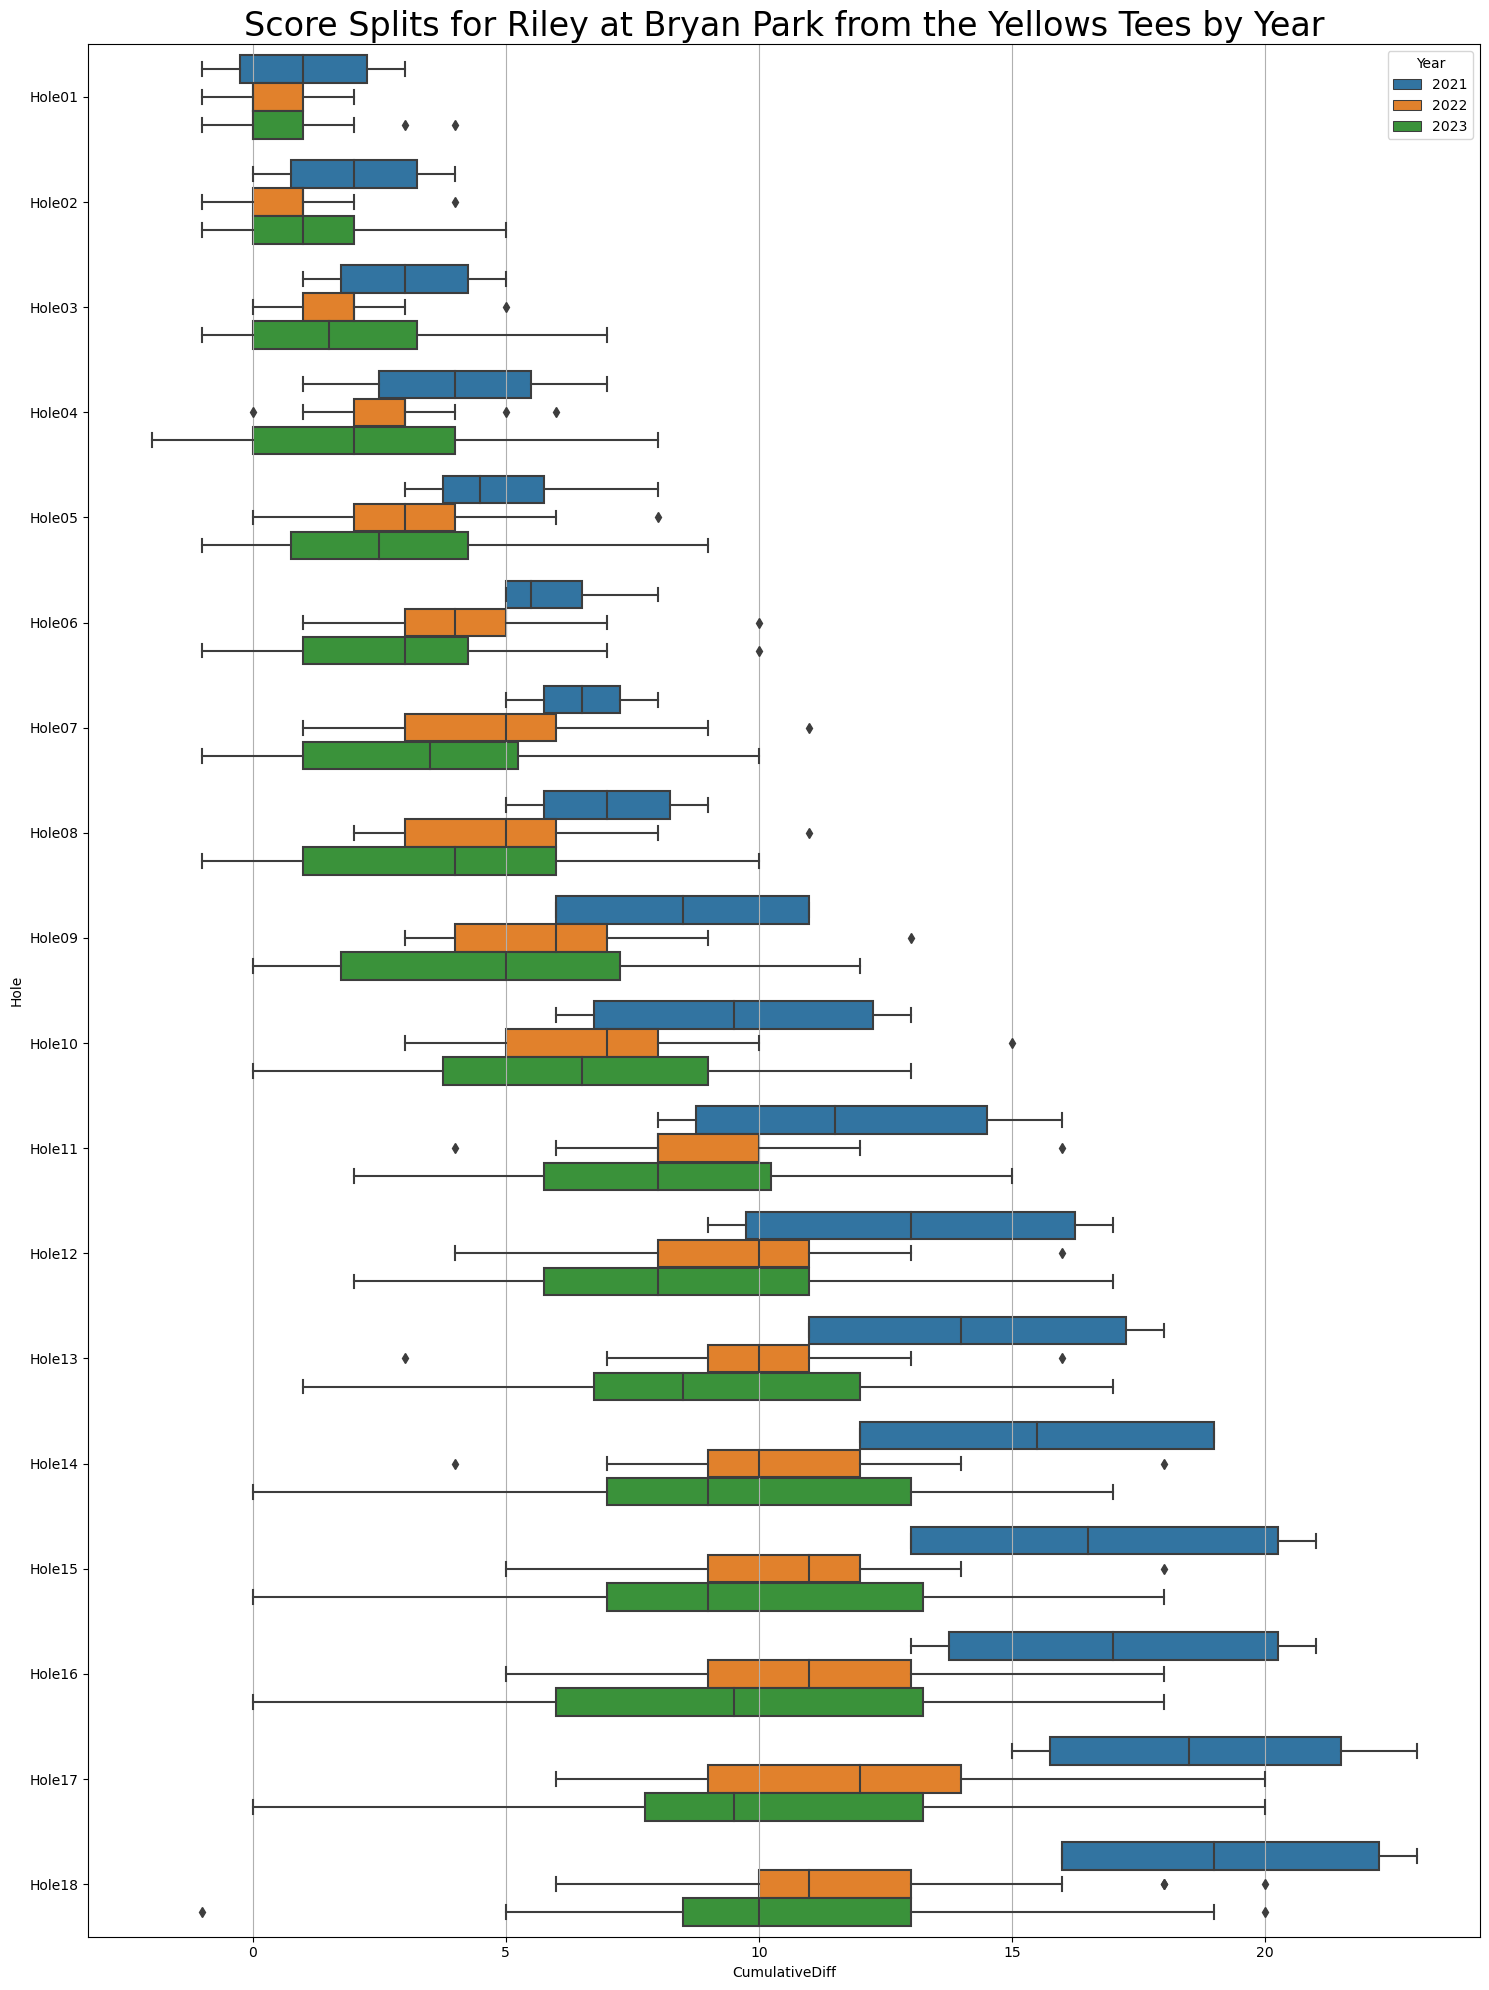

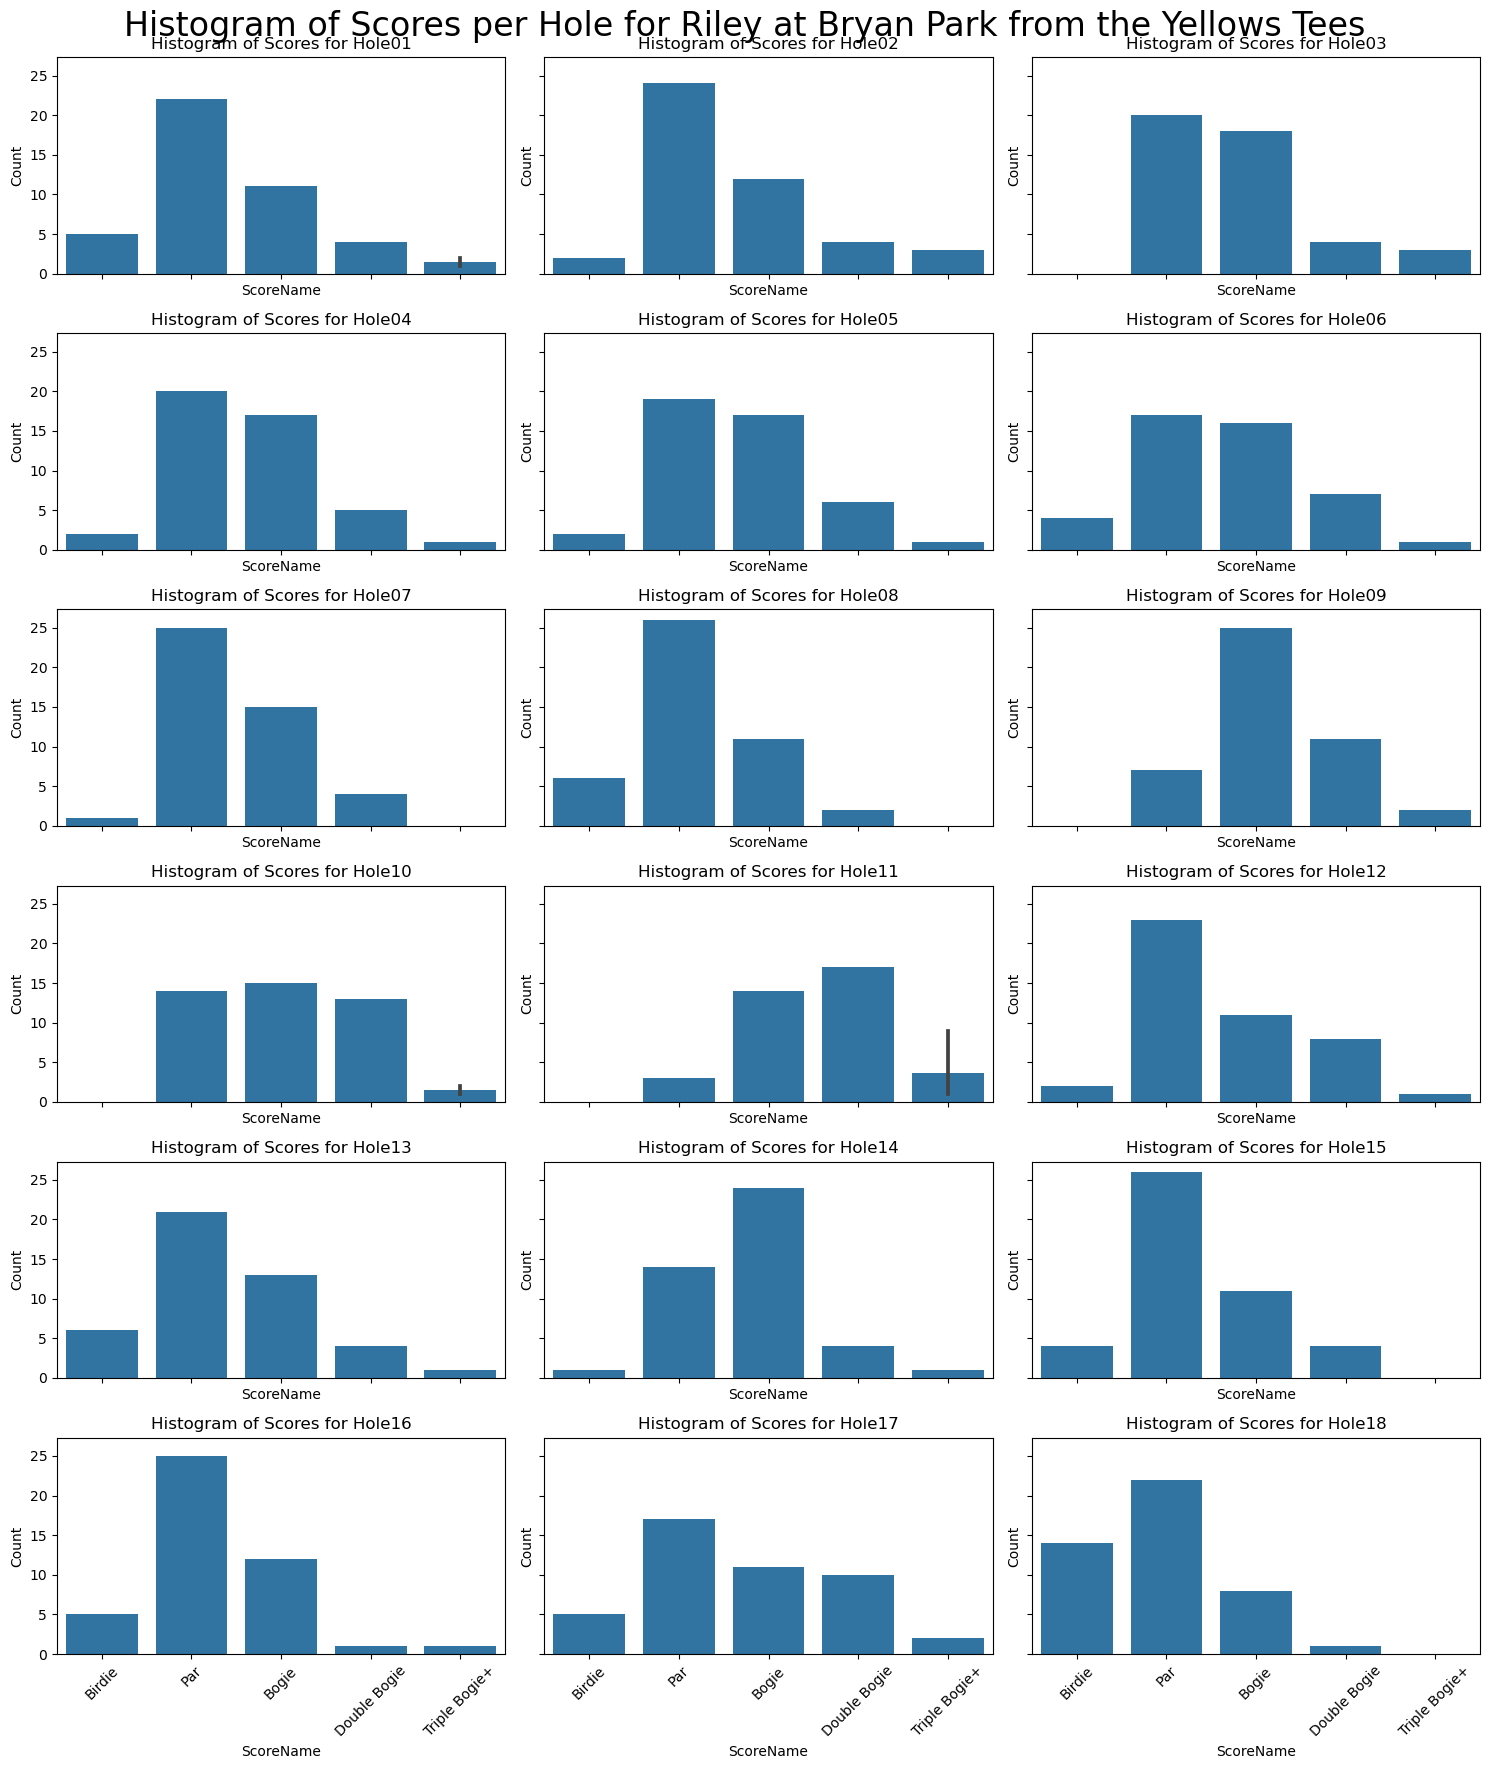

In [10]:
get_player_stats(
    df=df,
    player="Riley",
    course=course,
    layout=layout,
    min_date=min_date,
)